# Explore Fuse Pose Estimates
Stefan/Yuzhao Heng
Since Tues. Nov. 2nd, 2021

i.e. Get pose candidates from the HSR's laser scan in locating KUKA, and candidates from KUKA's laser scan in locating HSR.


## Setup



In [1]:
from icecream import ic

from scripts.util import *
from scripts.robo_pose_estimator import *


rcParams["figure.dpi"] = 300
rcParams['font.size'] = 6

pts_hsr = eg_hsr_scan()
guesses = config('heuristics.pose_guess')

tsf_ideal = tsl_n_angle2tsf(config('heuristics.pose_guess.actual_pose'))

dim_kuka = config('dimensions.KUKA')



## A straightforward approach: ICP

### Setup
Empirically have `robot_a` as HSR, `robot_b` as KUKA



In [2]:
pcr_kuka = get_kuka_pointcloud()
fp = PoseEstimator.FusePose(pcr_b=pcr_kuka)



### No guess whatsoever
i.e. Identity transformation


#### Source as laser scans
Not good, too much noise



ic| 'Initial guess': 'Initial guess'
    init_tsf: array([[1., 0., 0.],
                     [0., 1., 0.],
                     [0., 0., 1.]])
ic| tsf_: array([[ 0.99722373, -0.07446362,  0.25425722],
                 [ 0.07446362,  0.99722373,  0.39325788],
                 [ 0.        ,  0.        ,  1.        ]])
    tsl: array([0.25425722, 0.39325788])
    math.degrees(theta): 4.270403888855923


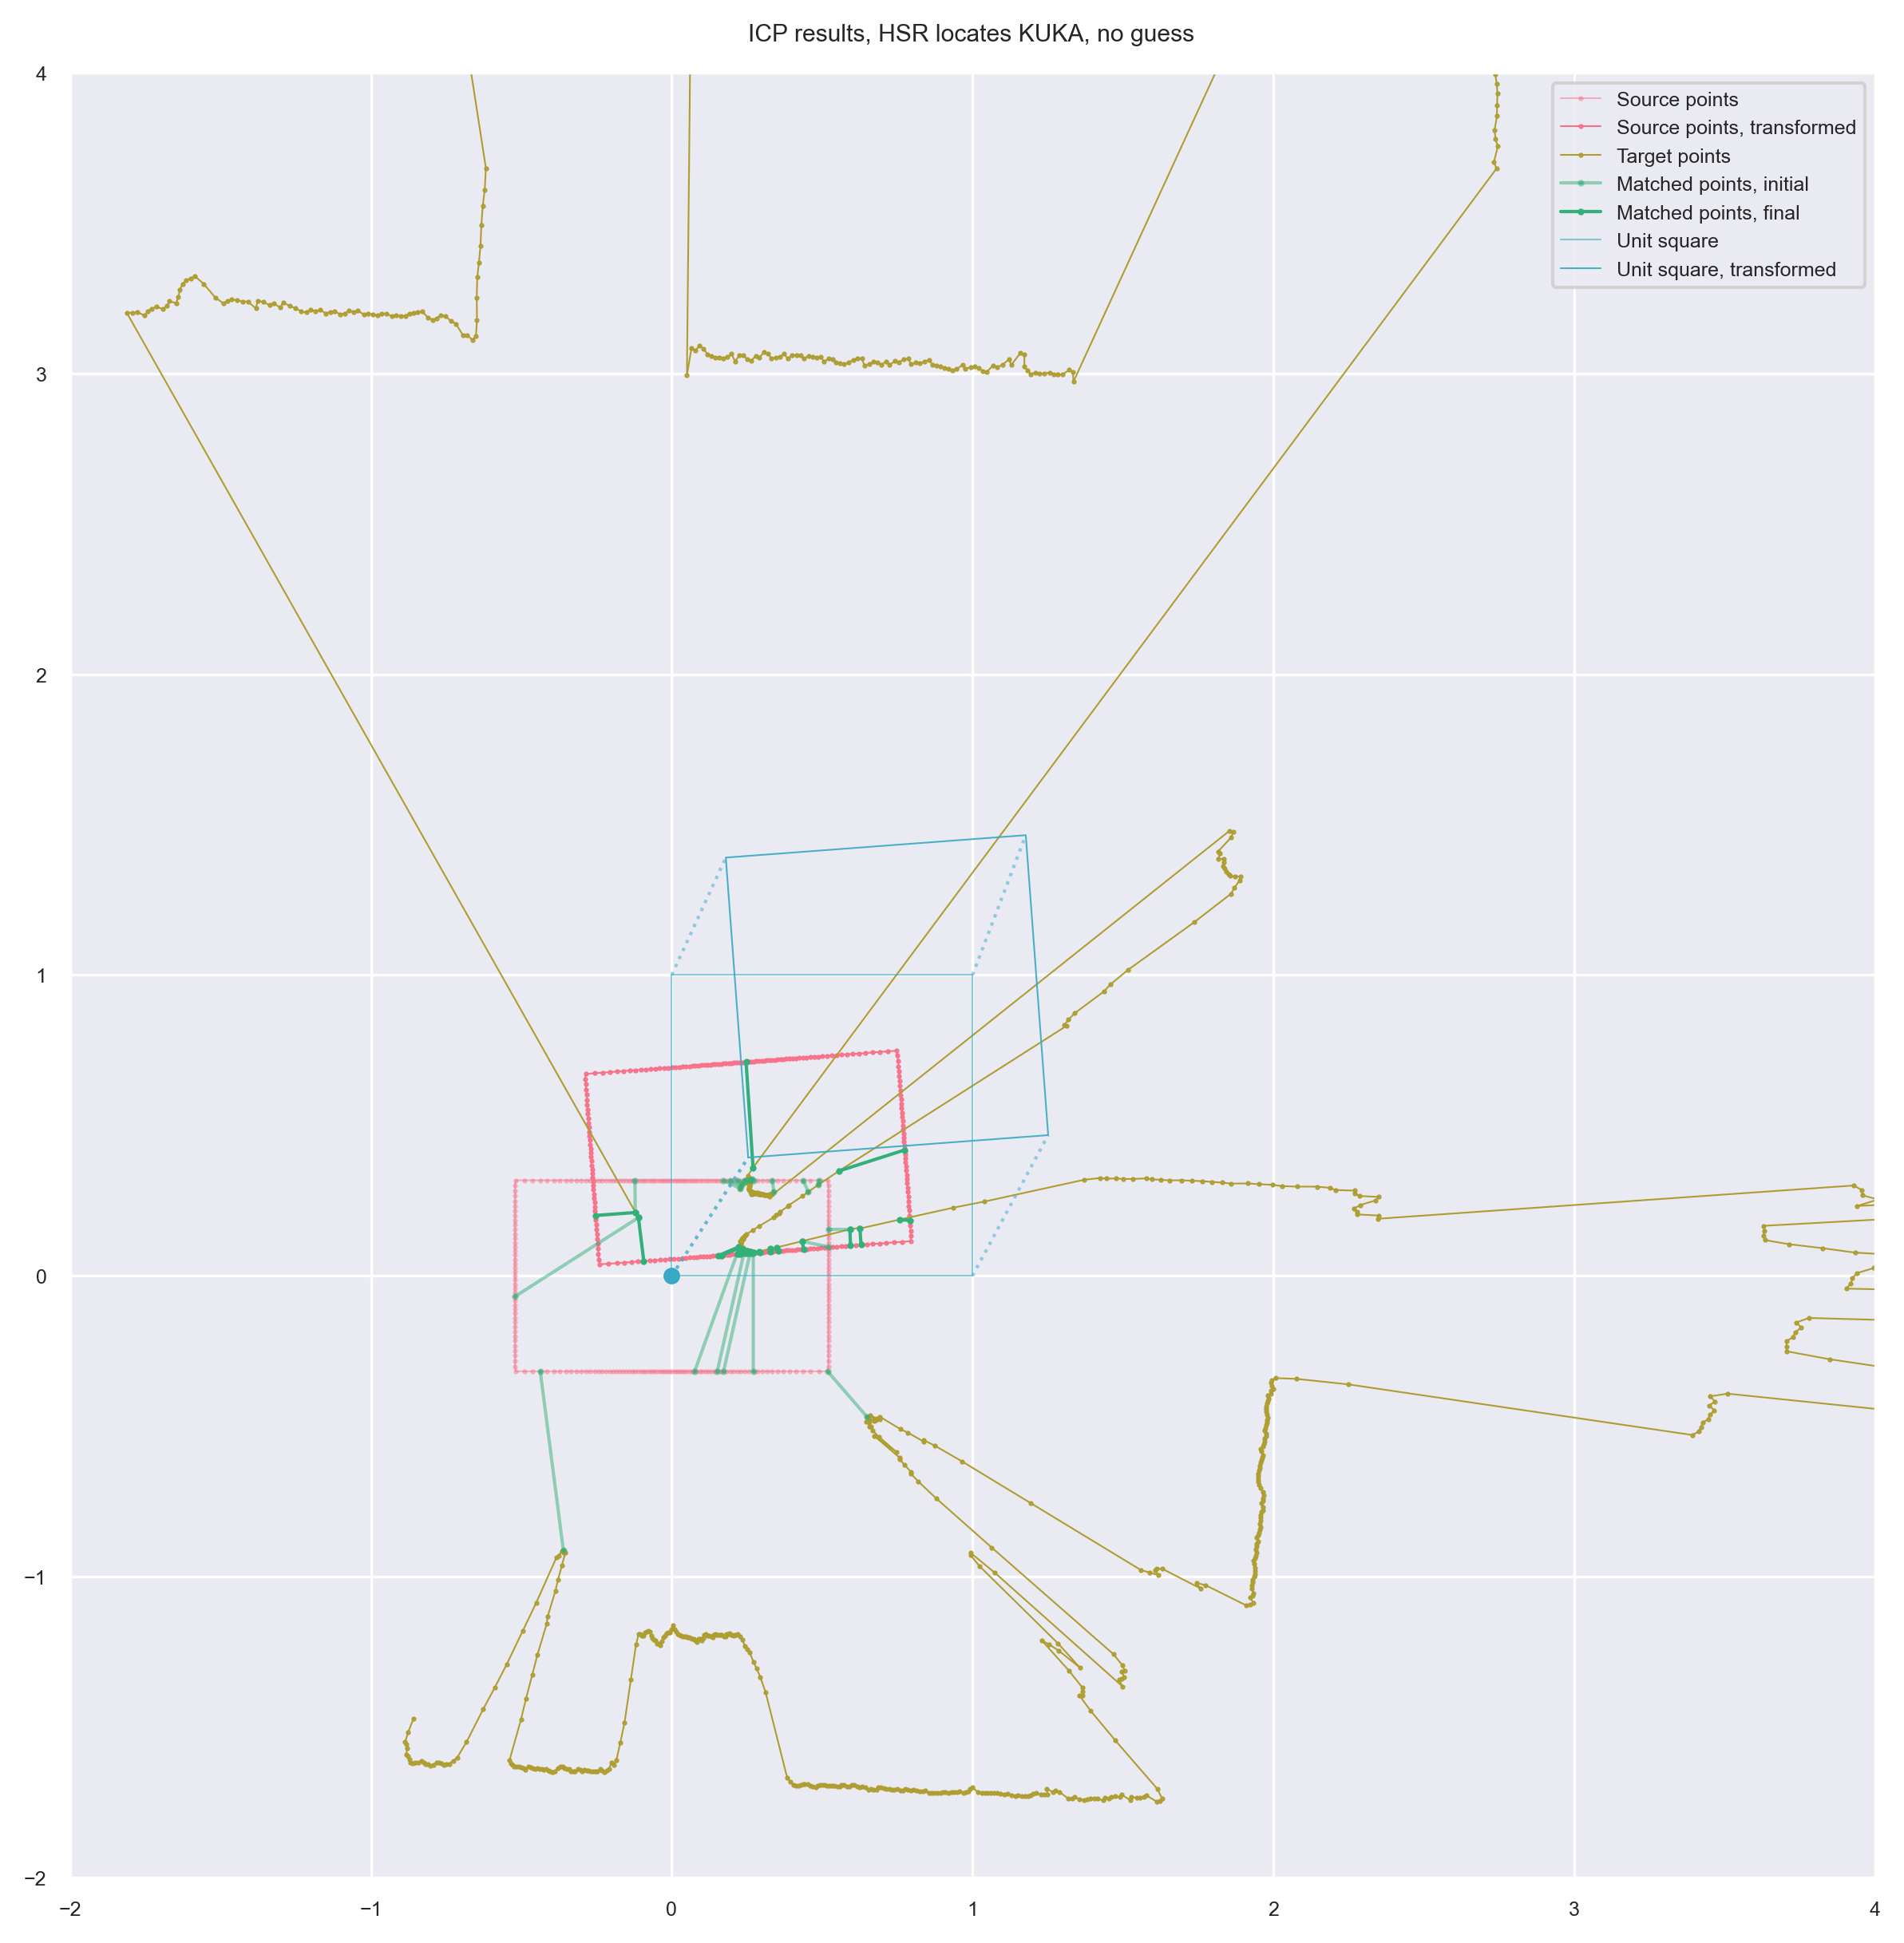

(array([[ 0.99722373, -0.07446362,  0.25401324],
        [ 0.07446362,  0.99722373,  0.3933381 ],
        [ 0.        ,  0.        ,  1.        ]]),
 [(array([[ 0.24362632,  0.3175    ],
          [ 0.25710643,  0.3175    ],
          [ 0.27117062,  0.3175    ],
          [ 0.48890713,  0.3175    ],
          [ 0.2182117 ,  0.3175    ],
          [ 0.33457519,  0.3175    ],
          [ 0.43700126,  0.3175    ],
          [ 0.19456425,  0.3175    ],
          [ 0.17238843,  0.3175    ],
          [ 0.5207    ,  0.15423837],
          [ 0.5207    ,  0.09650604],
          [-0.12187683,  0.3175    ],
          [ 0.51811291, -0.3175    ],
          [ 0.27117062, -0.3175    ],
          [ 0.17238843, -0.3175    ],
          [ 0.15143973, -0.3175    ],
          [ 0.07622501, -0.3175    ],
          [-0.5207    , -0.06855146],
          [-0.43700126, -0.3175    ]]),
   array([[ 0.24311473,  0.3176401 ],
          [ 0.25964079,  0.31860269],
          [ 0.2662391 ,  0.32094507],
          [ 0

In [3]:
visualize(
    pcr_kuka, pts_hsr,
    title='HSR locates KUKA, no guess',
    xlim=[-2, 4], ylim=[-2, 4],
    save=True,
    with_arrow=False
)



#### The reversed direction
Since we match each point in source to any points in target, this direction is not good



ic| 'Initial guess': 'Initial guess'
    init_tsf: array([[1., 0., 0.],
                     [0., 1., 0.],
                     [0., 0., 1.]])
ic| tsf_: array([[ 0.80362475,  0.59513634, -2.5037136 ],
                 [-0.59513634,  0.80362475, -0.53233406],
                 [ 0.        ,  0.        ,  1.        ]])
    tsl: array([-2.5037136 , -0.53233406])
    math.degrees(theta): 36.522352308269596


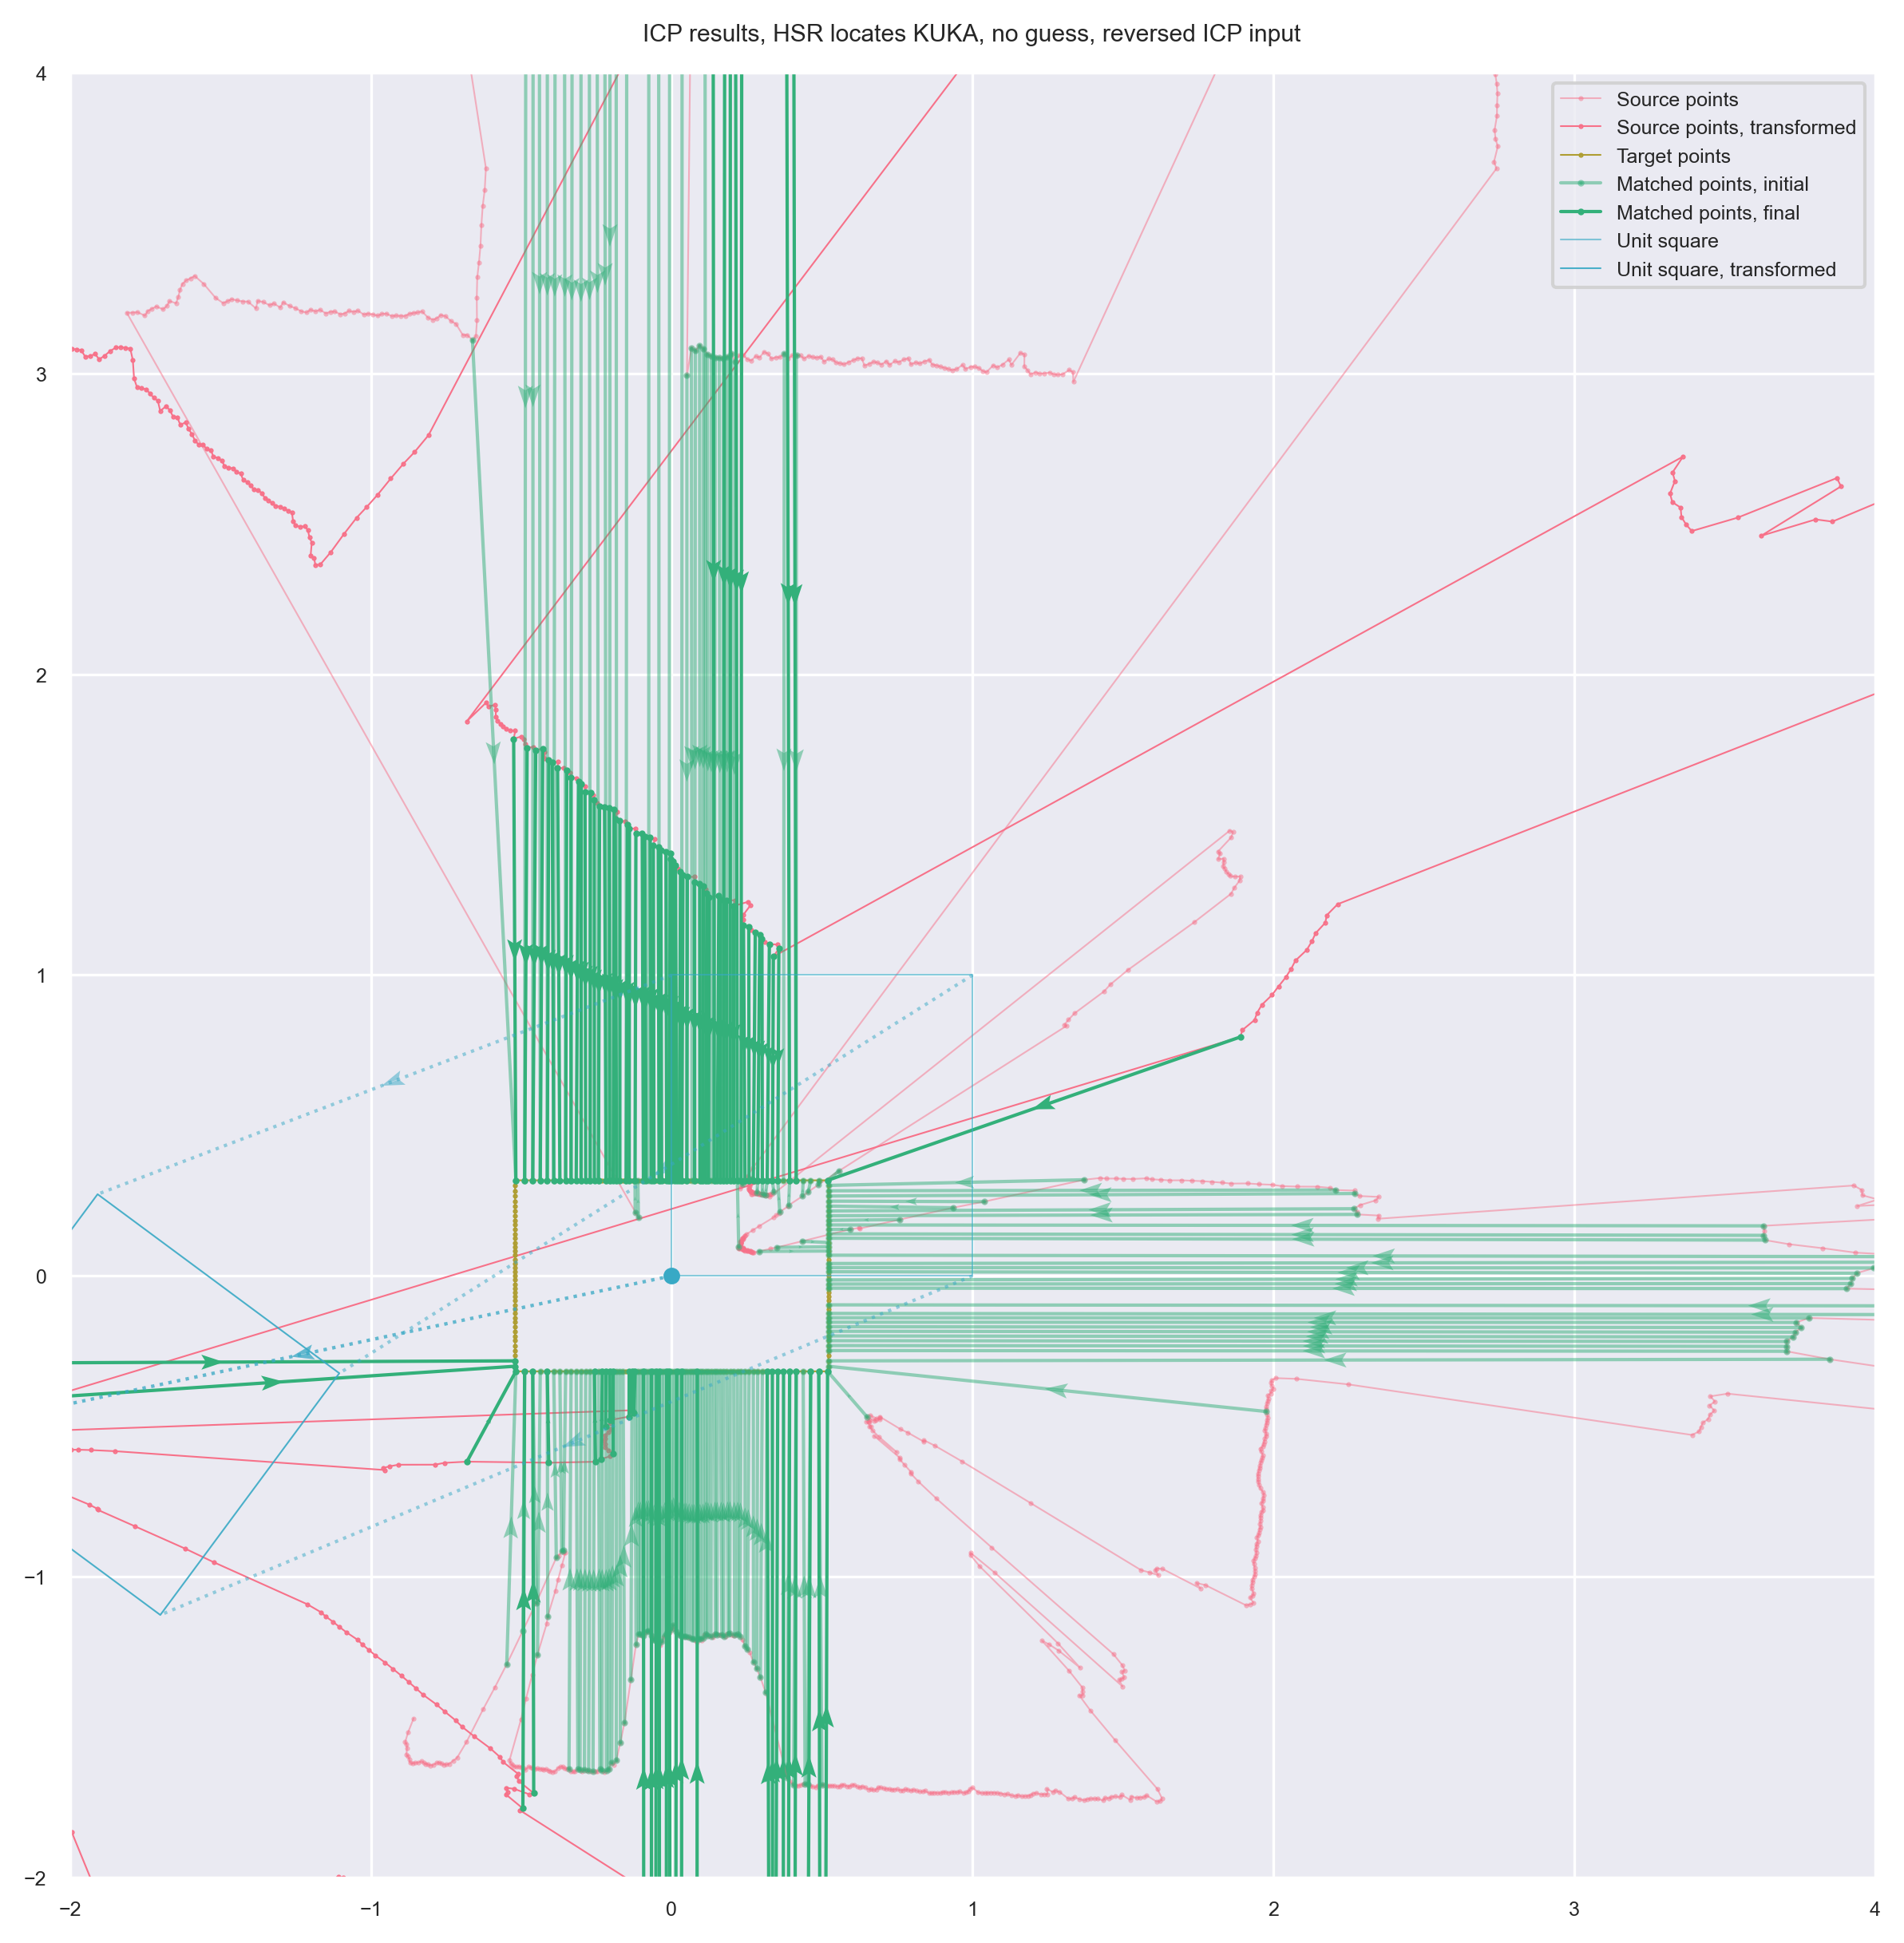

(array([[ 0.86746729,  0.49749422, -2.6646348 ],
        [-0.49749422,  0.86746729, -0.8866005 ],
        [ 0.        ,  0.        ,  1.        ]]),
 [(array([[ 2.43114726e-01,  3.17640103e-01],
          [ 2.59640785e-01,  3.18602689e-01],
          [ 2.66239097e-01,  3.20945073e-01],
          [ 2.35328295e-01,  3.04705737e-01],
          [ 4.88466572e-01,  3.03356876e-01],
          [ 4.54008659e-01,  2.79222366e-01],
          [ 3.39550252e-01,  2.78256421e-01],
          [ 2.83990034e-01,  2.77414261e-01],
          [ 3.01331208e-01,  2.72094641e-01],
          [ 3.11728950e-01,  2.69386455e-01],
          [ 5.55762846e-01,  3.48516402e-01],
          [ 4.34723649e-01,  2.64757158e-01],
          [ 5.92211571e-01,  1.54367877e-01],
          [ 3.88775212e-01,  2.34456460e-01],
          [ 4.33017708e-01,  1.14889847e-01],
          [ 3.58954616e-01,  2.12227661e-01],
          [-1.21500961e-01,  2.10443619e-01],
          [-1.10658044e-01,  1.93607333e-01],
          [ 3.50451226e

In [4]:
visualize(
    pts_hsr, pcr_kuka,
    title='HSR locates KUKA, no guess, reversed ICP input',
    xlim=[-2, 4], ylim=[-2, 4],
    save=True
)



### An almost perfect guess
We guide the ICP with a good guess, where only rotation is wrong
But the raw ICP output is not ideal



ic| 'Initial guess': 'Initial guess'
    init_tsf: array([[ 1. , -0. ,  2.5],
                     [ 0. ,  1. , -0.5],
                     [ 0. ,  0. ,  1. ]])
ic| tsf_: array([[ 0.97860324,  0.20575641,  2.98679523],
                 [-0.20575641,  0.97860324, -0.09447856],
                 [ 0.        ,  0.        ,  1.        ]])
    tsl: array([ 2.98679523, -0.09447856])
    math.degrees(theta): 11.873782101241995


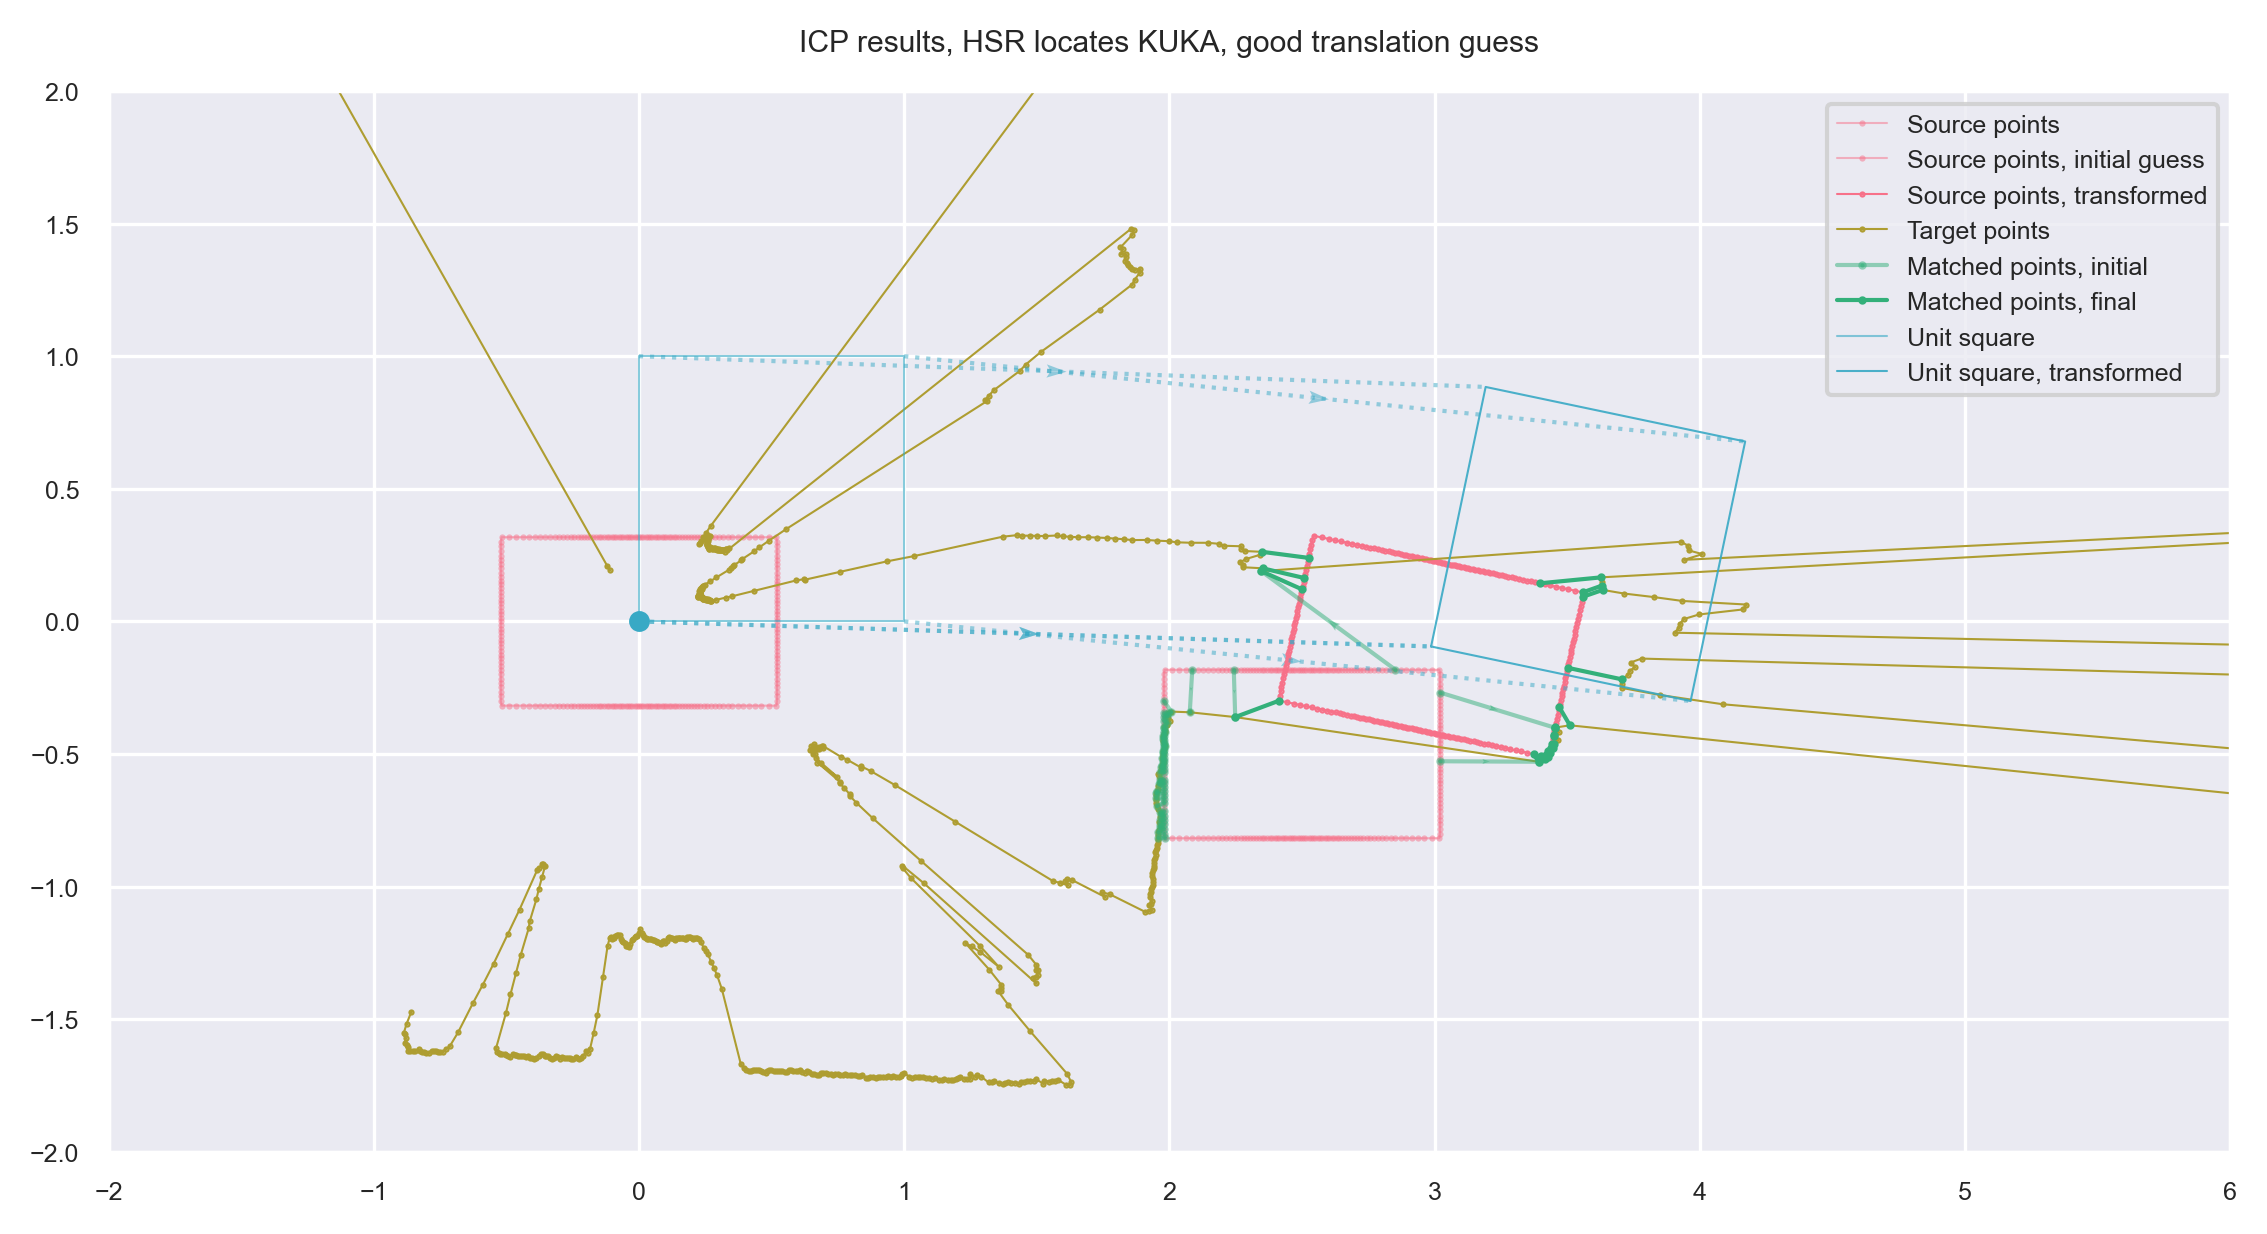

(array([[ 0.97860324,  0.20575641,  2.98698527],
        [-0.20575641,  0.97860324, -0.09452714],
        [ 0.        ,  0.        ,  1.        ]]),
 [(array([[ 1.9793    , -0.45902002],
          [ 1.9793    , -0.48636499],
          [ 1.9793    , -0.41752922],
          [ 1.9793    , -0.43144854],
          [ 1.9793    , -0.47271127],
          [ 1.9793    , -0.44527222],
          [ 1.9793    , -0.52728873],
          [ 1.9793    , -0.5       ],
          [ 1.9793    , -0.40349396],
          [ 1.9793    , -0.51363501],
          [ 1.9793    , -0.54097998],
          [ 1.9793    , -0.73183058],
          [ 1.9793    , -0.55472778],
          [ 1.9793    , -0.74836116],
          [ 1.9793    , -0.78271703],
          [ 1.9793    , -0.715681  ],
          [ 1.9793    , -0.36047886],
          [ 1.9793    , -0.59650604],
          [ 1.9793    , -0.56855146],
          [ 1.9793    , -0.37499099],
          [ 1.9793    , -0.7653099 ],
          [ 1.9793    , -0.34576163],
          [ 1.9

In [5]:
visualize(
    fp.pcr_b, pts_hsr,
    init_tsf=tsl_n_angle2tsf(guesses['good_no_rotation']),
    title='HSR locates KUKA, good translation guess',
    xlim=[-2, 6], ylim=[-2, 2]
)



## A perfect guess?
The noise in the HSR laser scans breaks up the initial good estimates



ic| 'Initial guess': 'Initial guess'
    init_tsf: array([[ 0.98877108,  0.14943813,  2.5       ],
                     [-0.14943813,  0.98877108, -0.75      ],
                     [ 0.        ,  0.        ,  1.        ]])
ic| tsf_: array([[ 0.9215292 ,  0.38830908,  2.77794104],
                 [-0.38830908,  0.9215292 , -0.37008568],
                 [ 0.        ,  0.        ,  1.        ]])
    tsl: array([ 2.77794104, -0.37008568])
    math.degrees(theta): 22.849326090185947


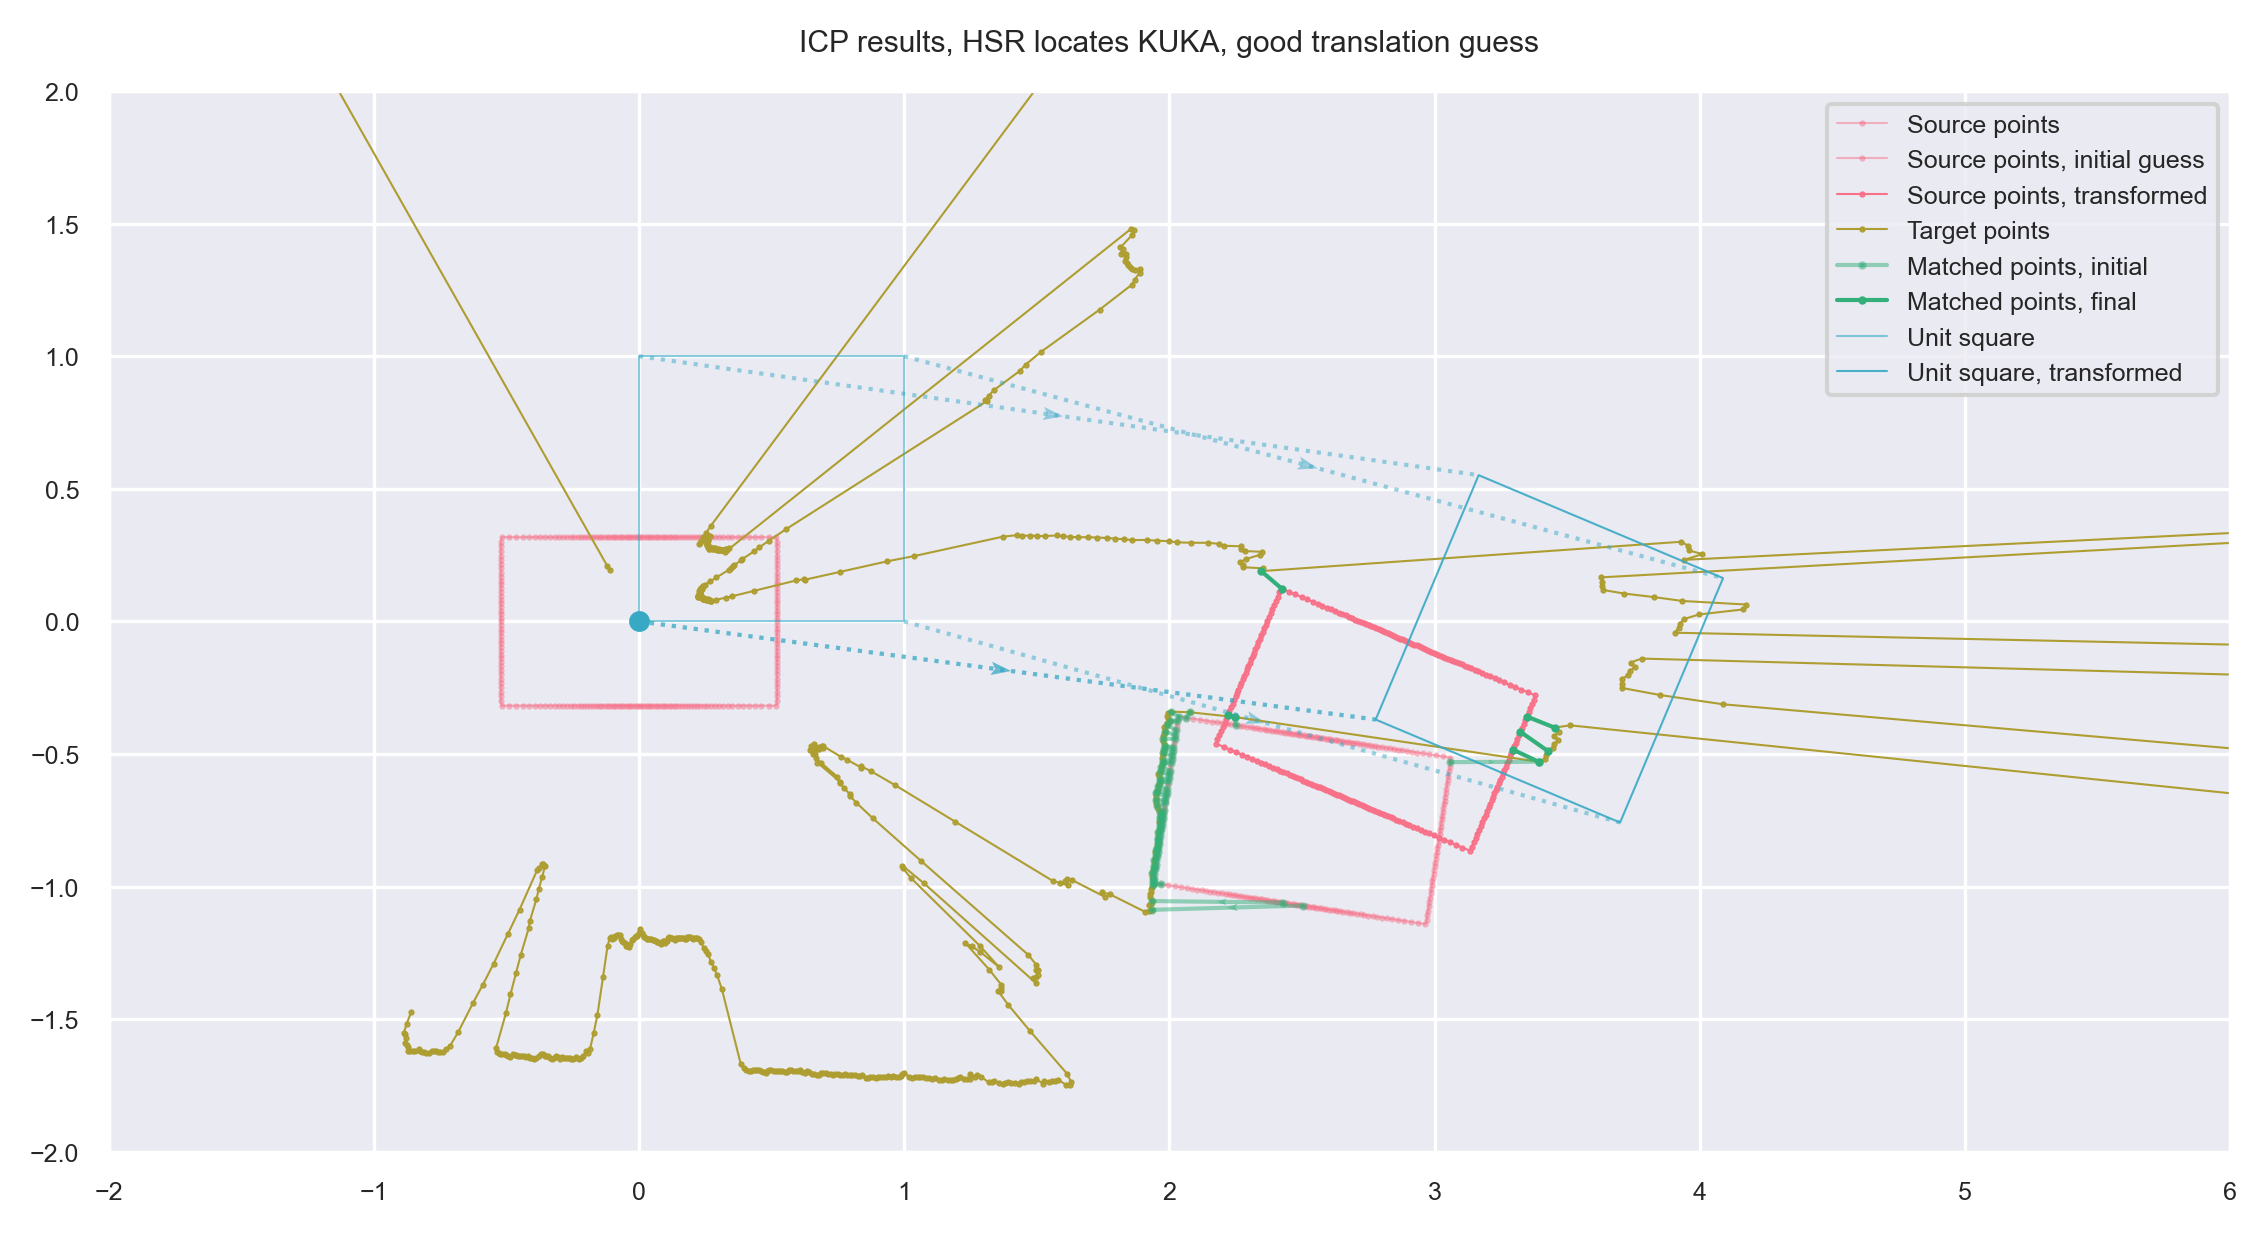

(array([[ 0.91676692,  0.3994226 ,  2.83434407],
        [-0.3994226 ,  0.91676692, -0.37786204],
        [ 0.        ,  0.        ,  1.        ]]),
 [(array([[ 1.94022187, -0.96943814],
          [ 1.96860736, -0.78162297],
          [ 1.94549948, -0.93451832],
          [ 1.95759207, -0.85450661],
          [ 1.95986411, -0.83947348],
          [ 1.94803227, -0.9177599 ],
          [ 1.94025833, -0.98650899],
          [ 1.95291593, -0.8854467 ],
          [ 1.97072522, -0.76760995],
          [ 1.96209781, -0.824694  ],
          [ 1.95050257, -0.90141493],
          [ 1.96429712, -0.81014204],
          [ 1.97282262, -0.75373228],
          [ 1.9552775 , -0.86982115],
          [ 1.96646579, -0.79579286],
          [ 1.97696848, -0.72630081],
          [ 1.9749027 , -0.73996926],
          [ 1.94289819, -0.95172999],
          [ 1.97902293, -0.71270738],
          [ 2.06402938, -0.36300381],
          [ 2.03007193, -0.37493699],
          [ 1.96913617, -0.99087345],
          [ 2.2

In [6]:
visualize(
    fp.pcr_b, pts_hsr,
    init_tsf=tsl_n_angle2tsf(guesses['actual_pose']),
    title='HSR locates KUKA, good translation guess',
    xlim=[-2, 6], ylim=[-2, 2]
)



## Cluster the point clouds first
then run ICP on each, with the relative translation to cluster center


### Clustering
What algorithm work well? Ideally the number of clusters shouldn't be fixed.


#### Setup



In [7]:
c = Cluster.cluster



#### Spectral Clustering



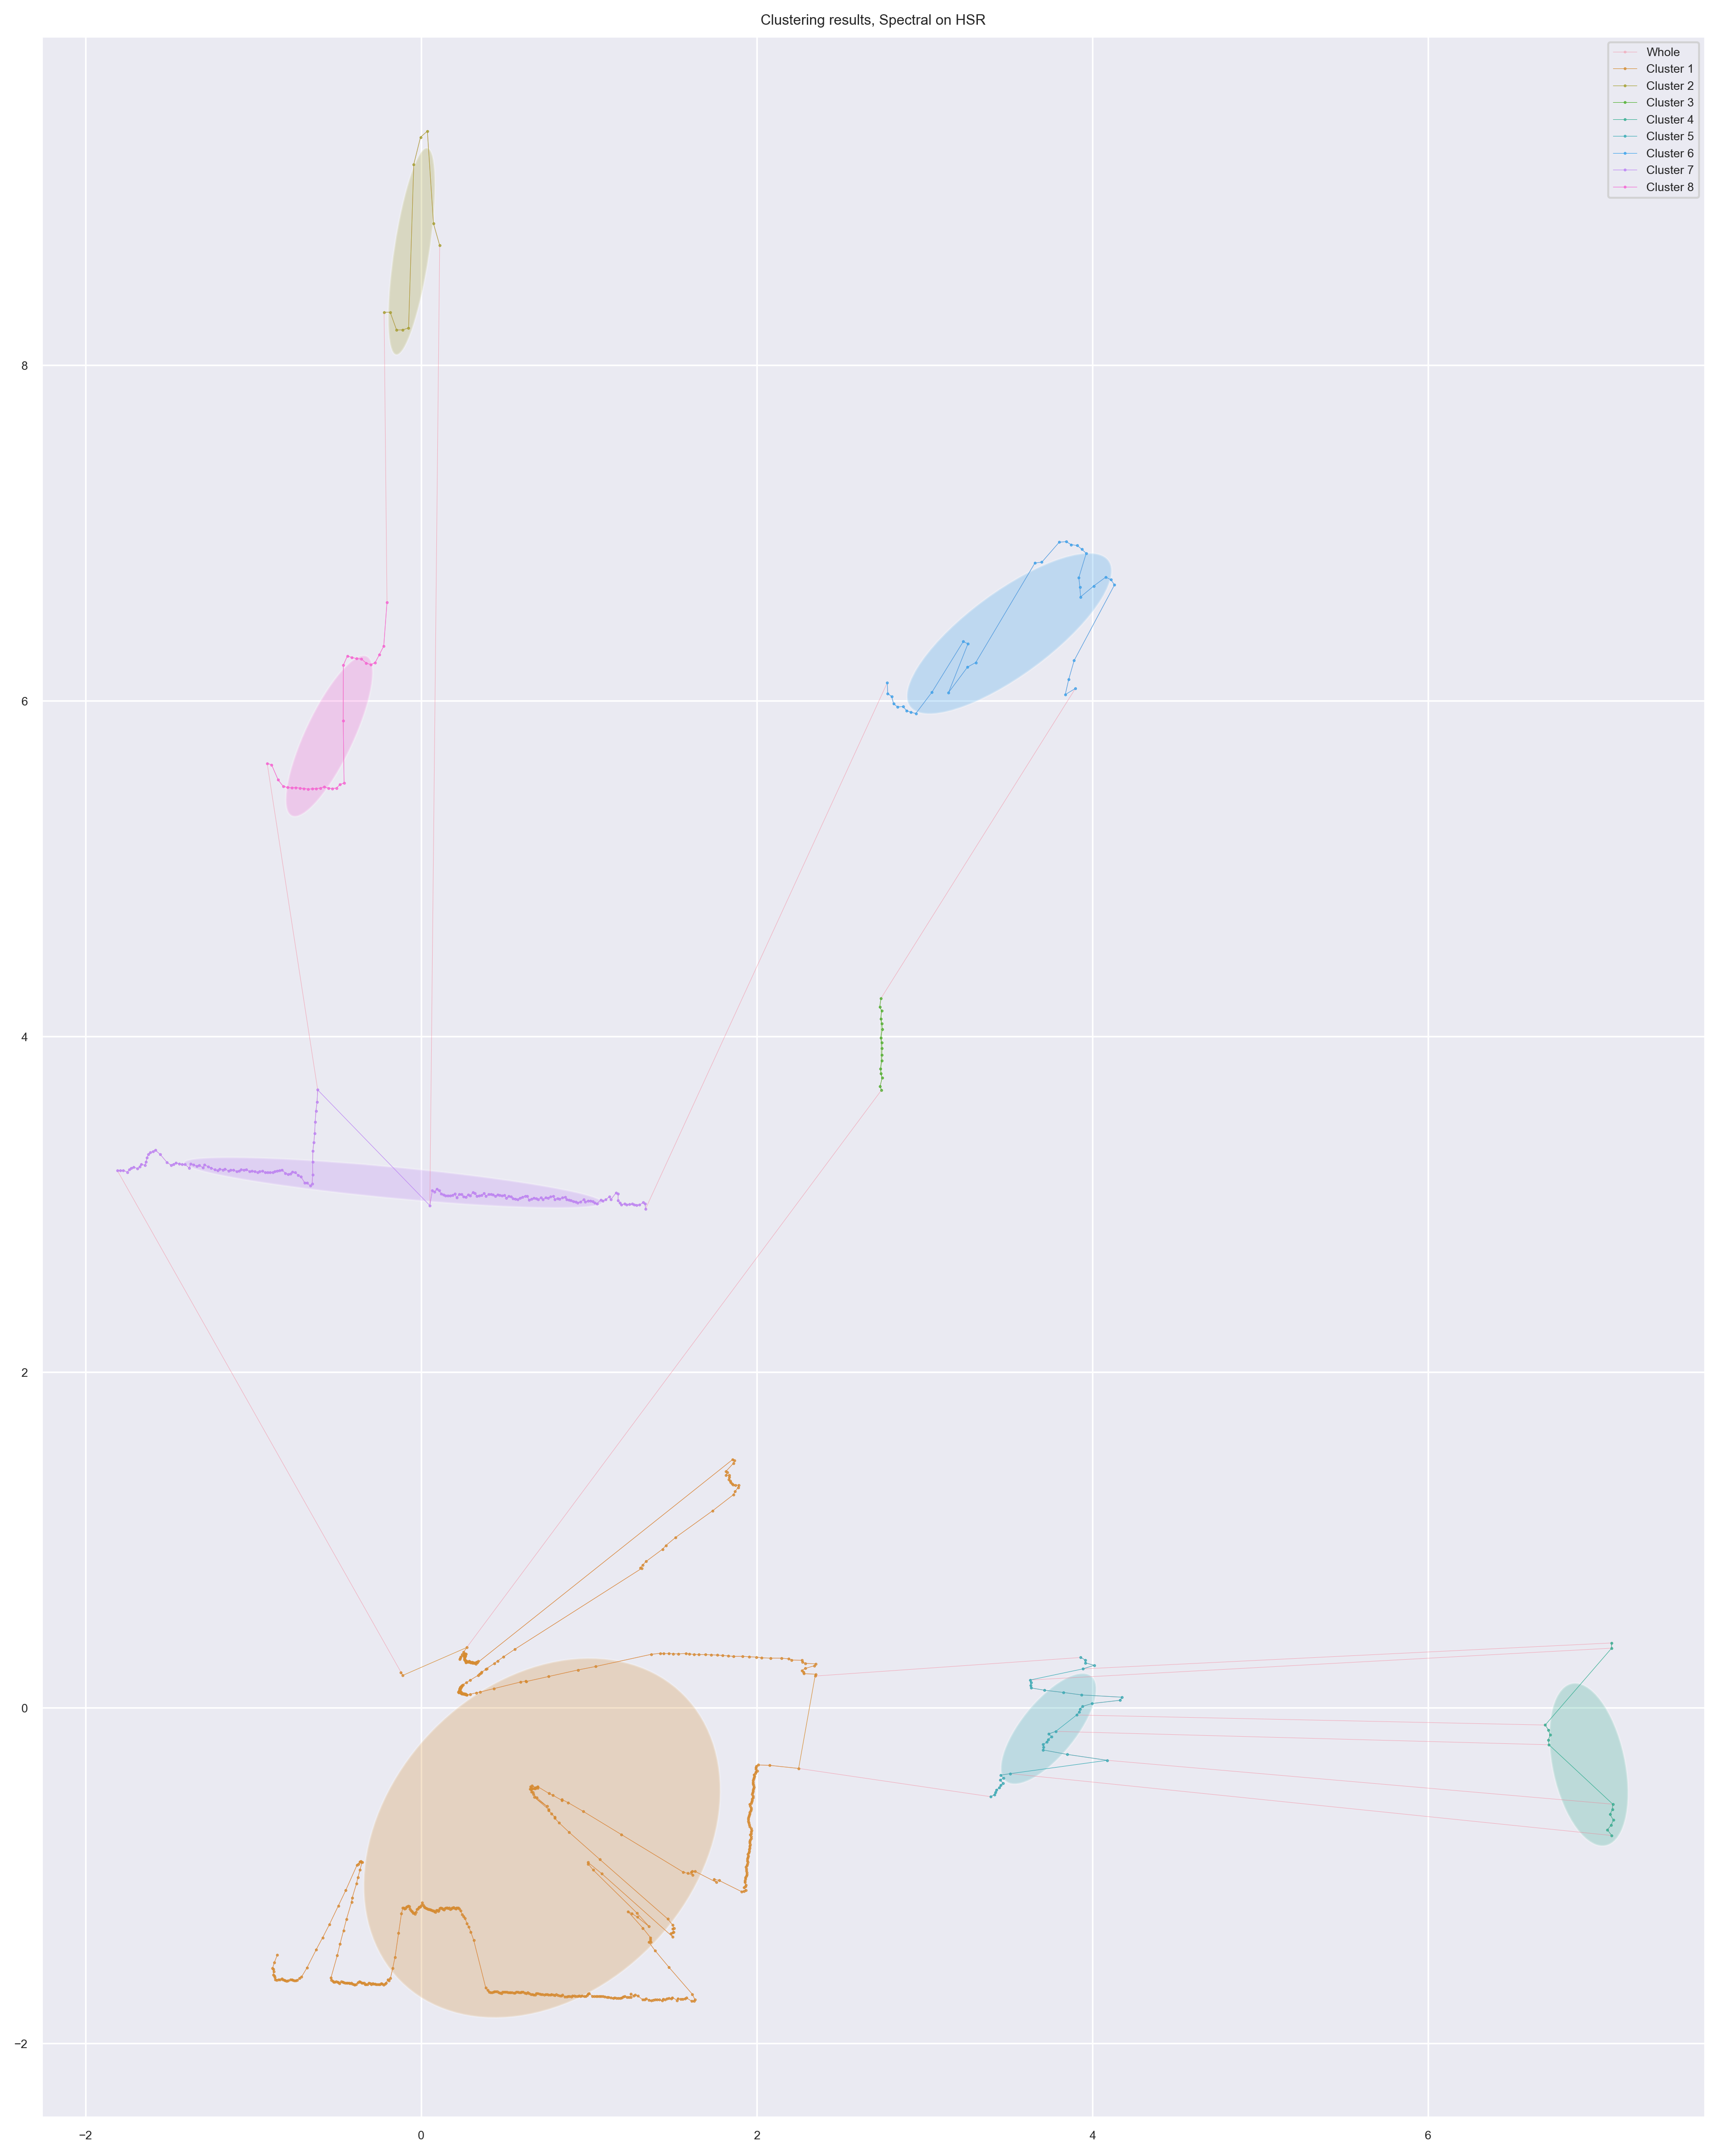

In [8]:
lbs = c(pts_hsr, approach='spectral', n_clusters=8)
plot_cluster(pts_hsr, lbs, title='Spectral on HSR')



#### Hierarchical Clustering



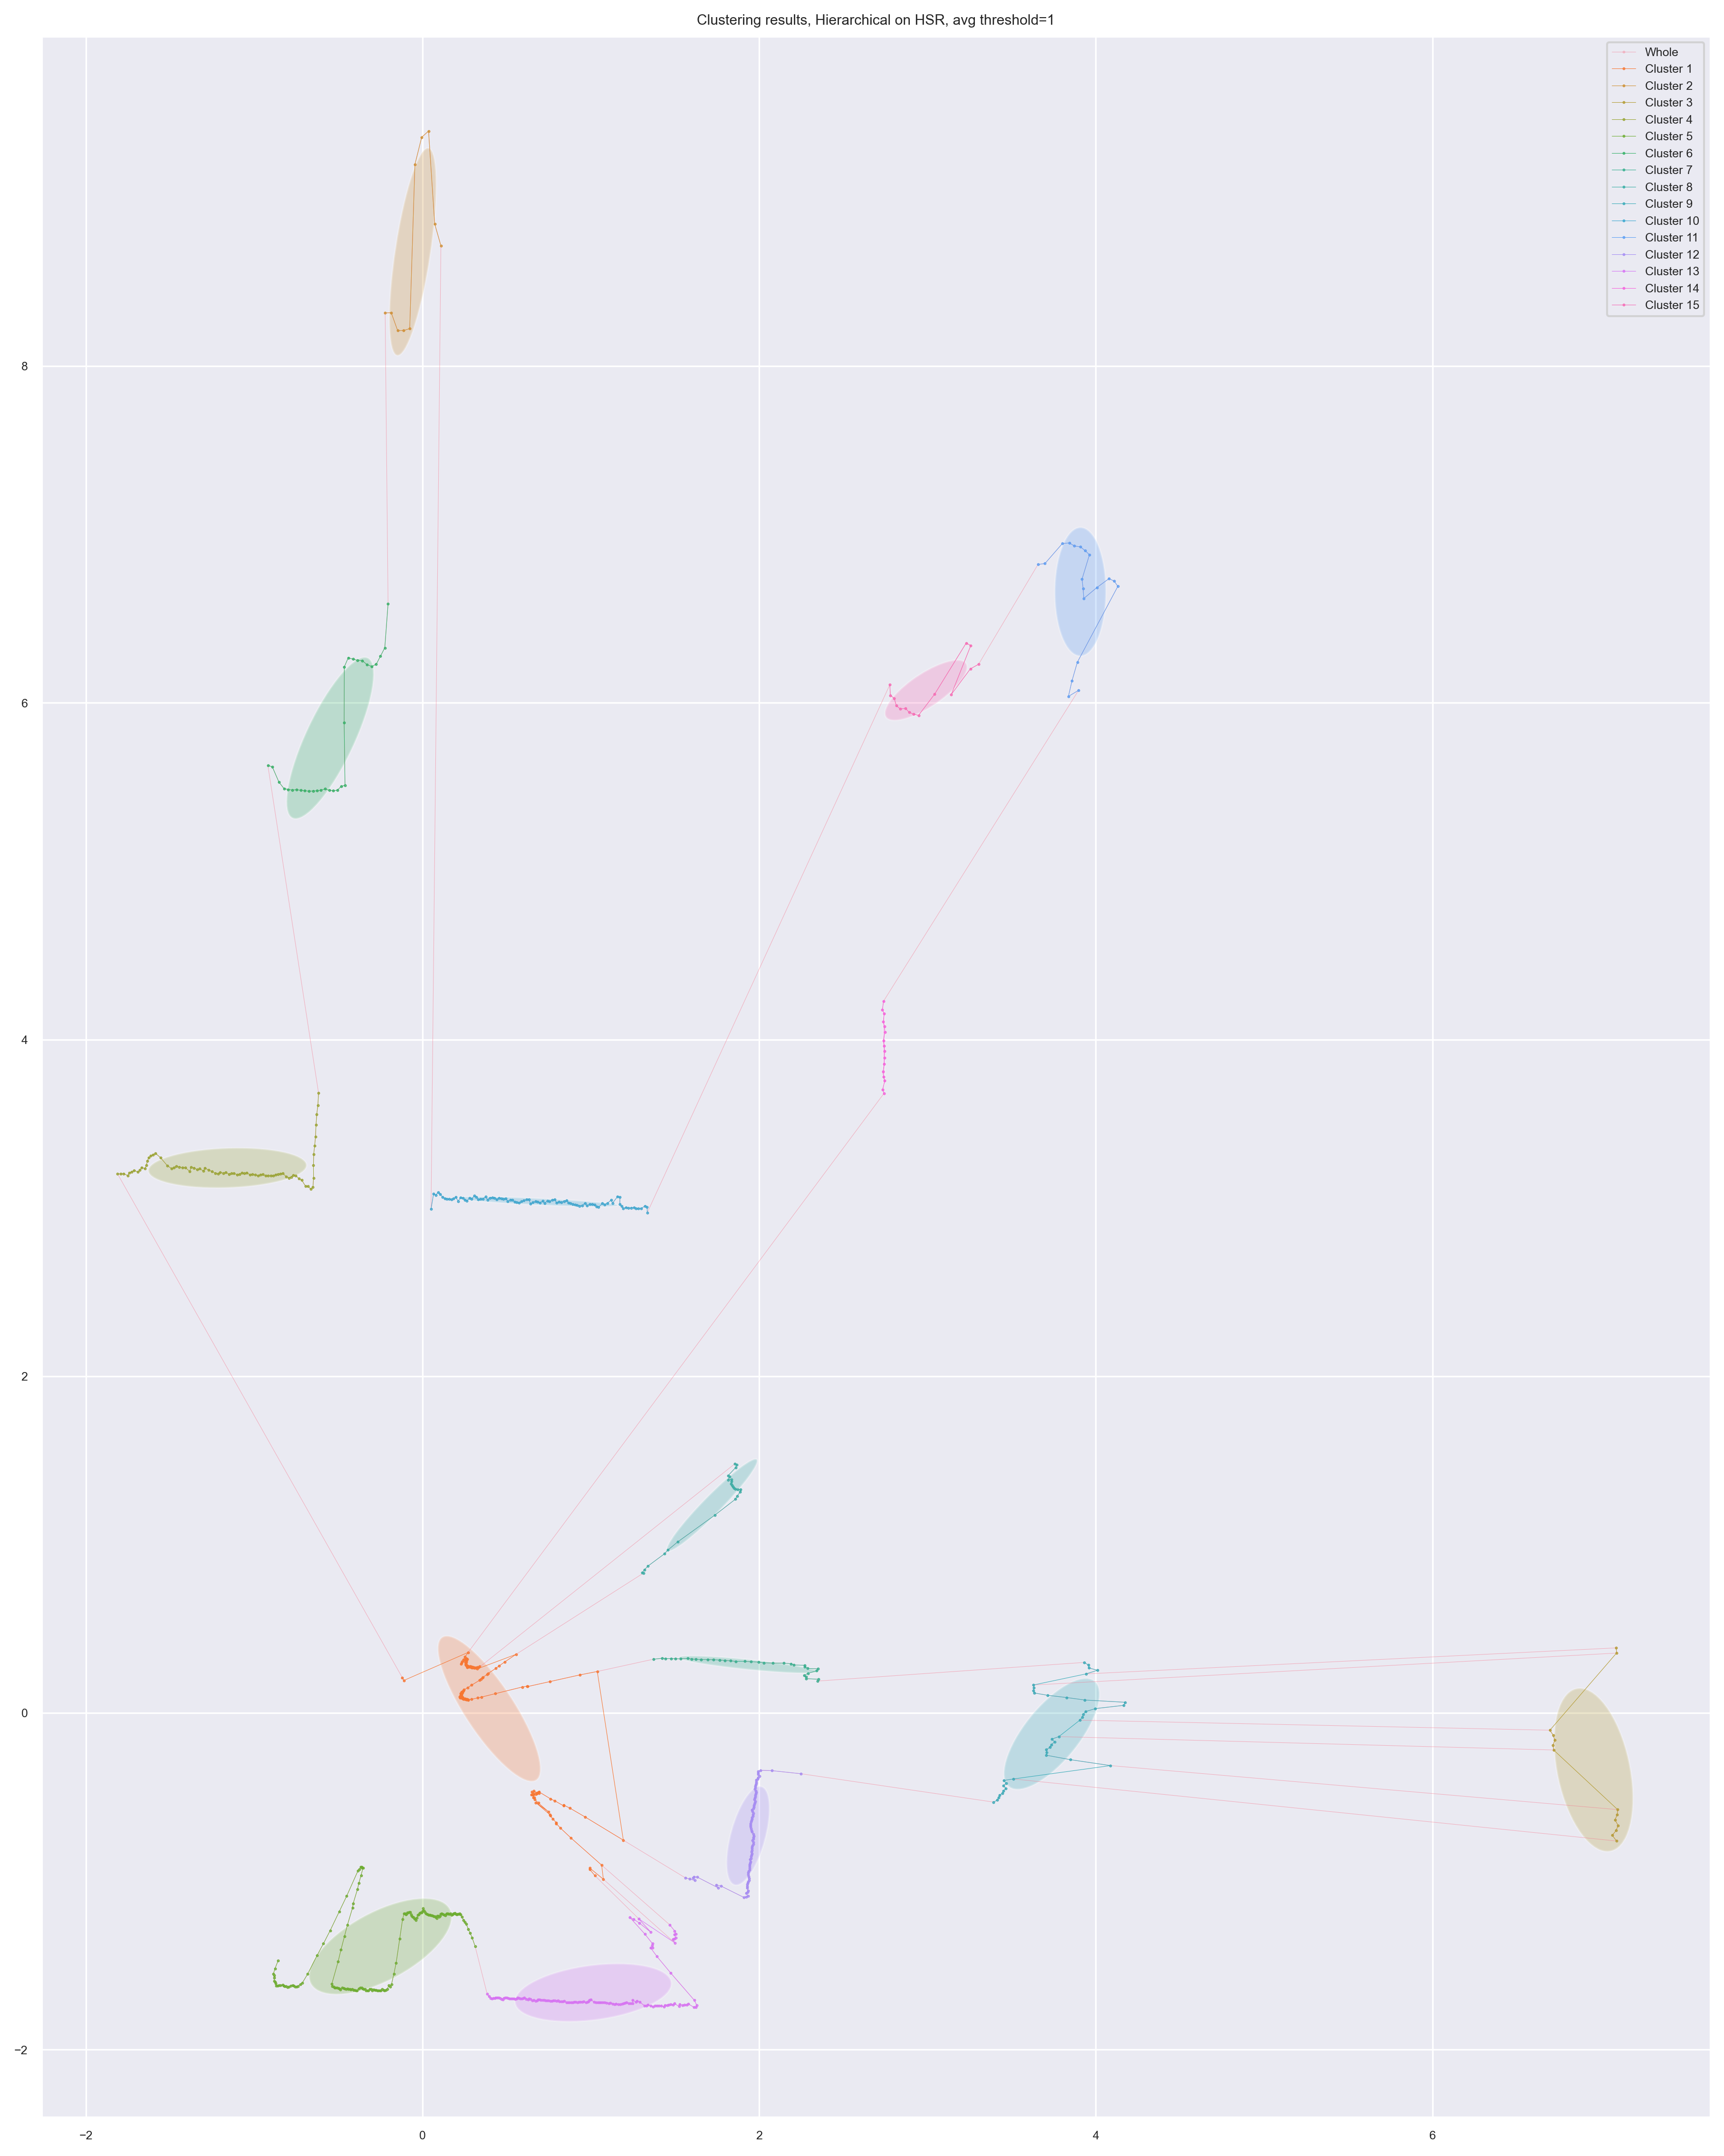

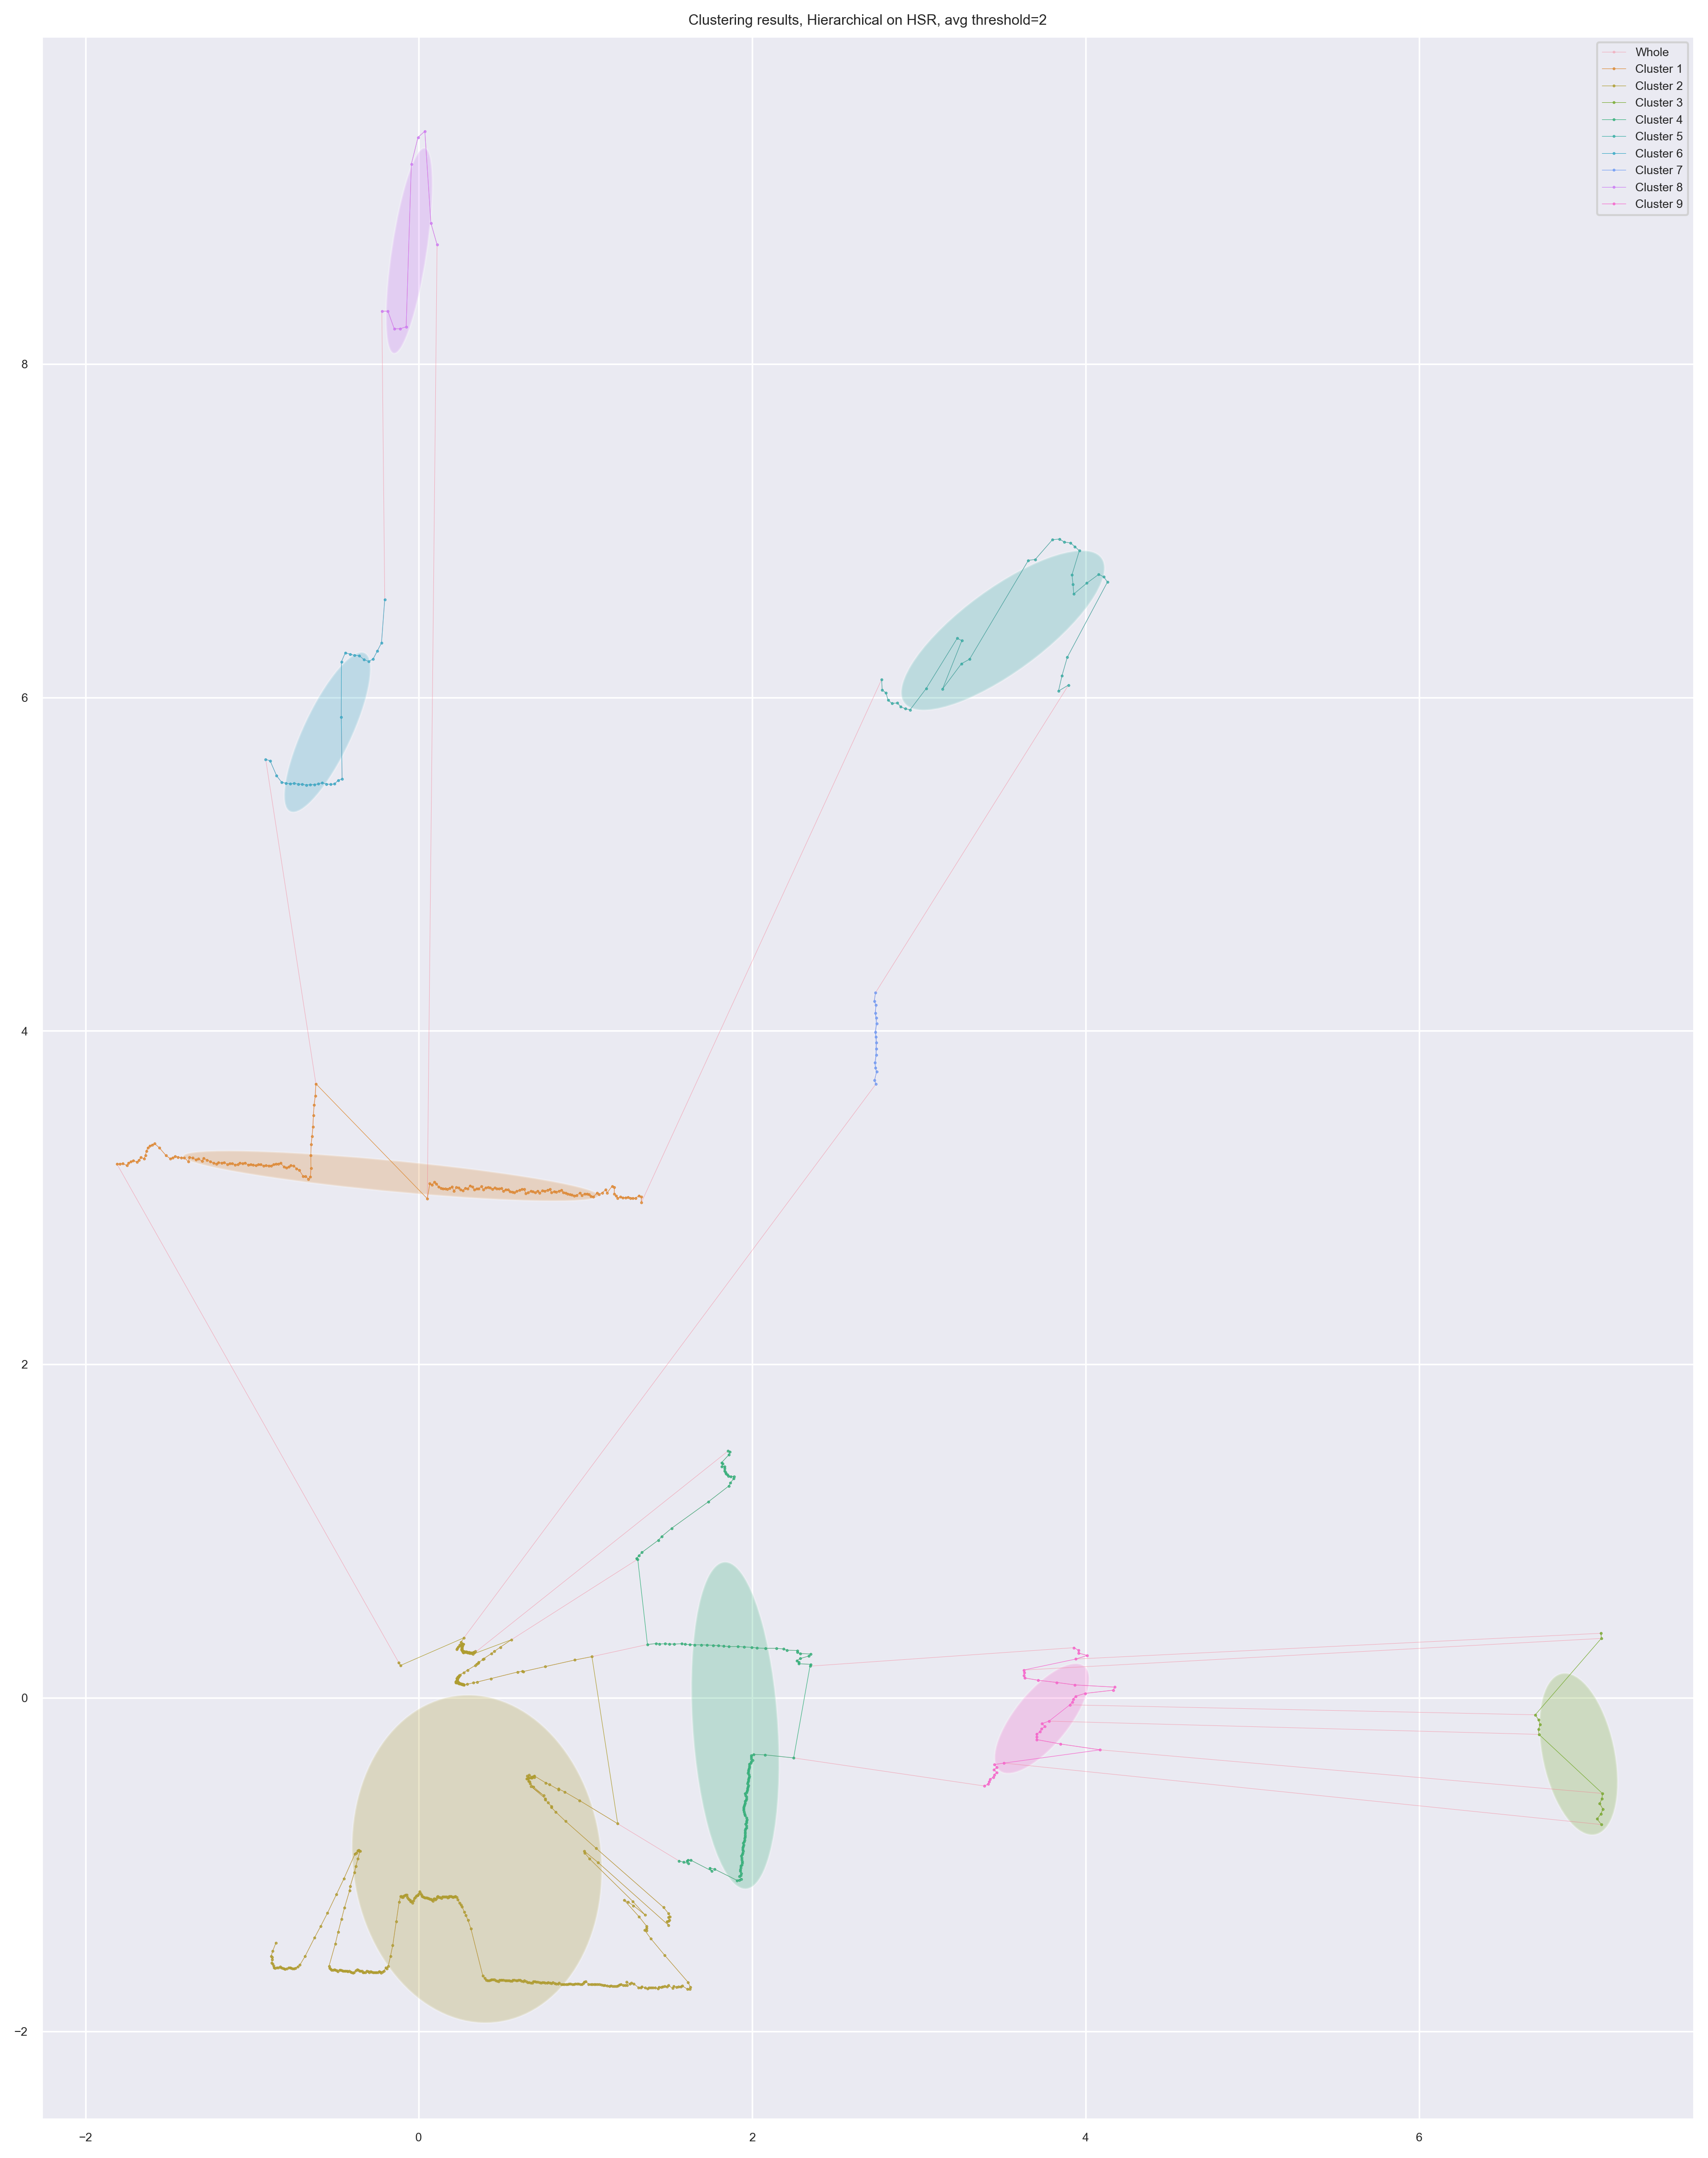

In [9]:
def _(d):
    lbs = c(pts_hsr, approach='hierarchical', distance_threshold=d)
    plot_cluster(pts_hsr, lbs, title=f'Hierarchical on HSR, avg threshold={d}')

_(1)
_(2)



#### Gaussian Mixture Model assignment



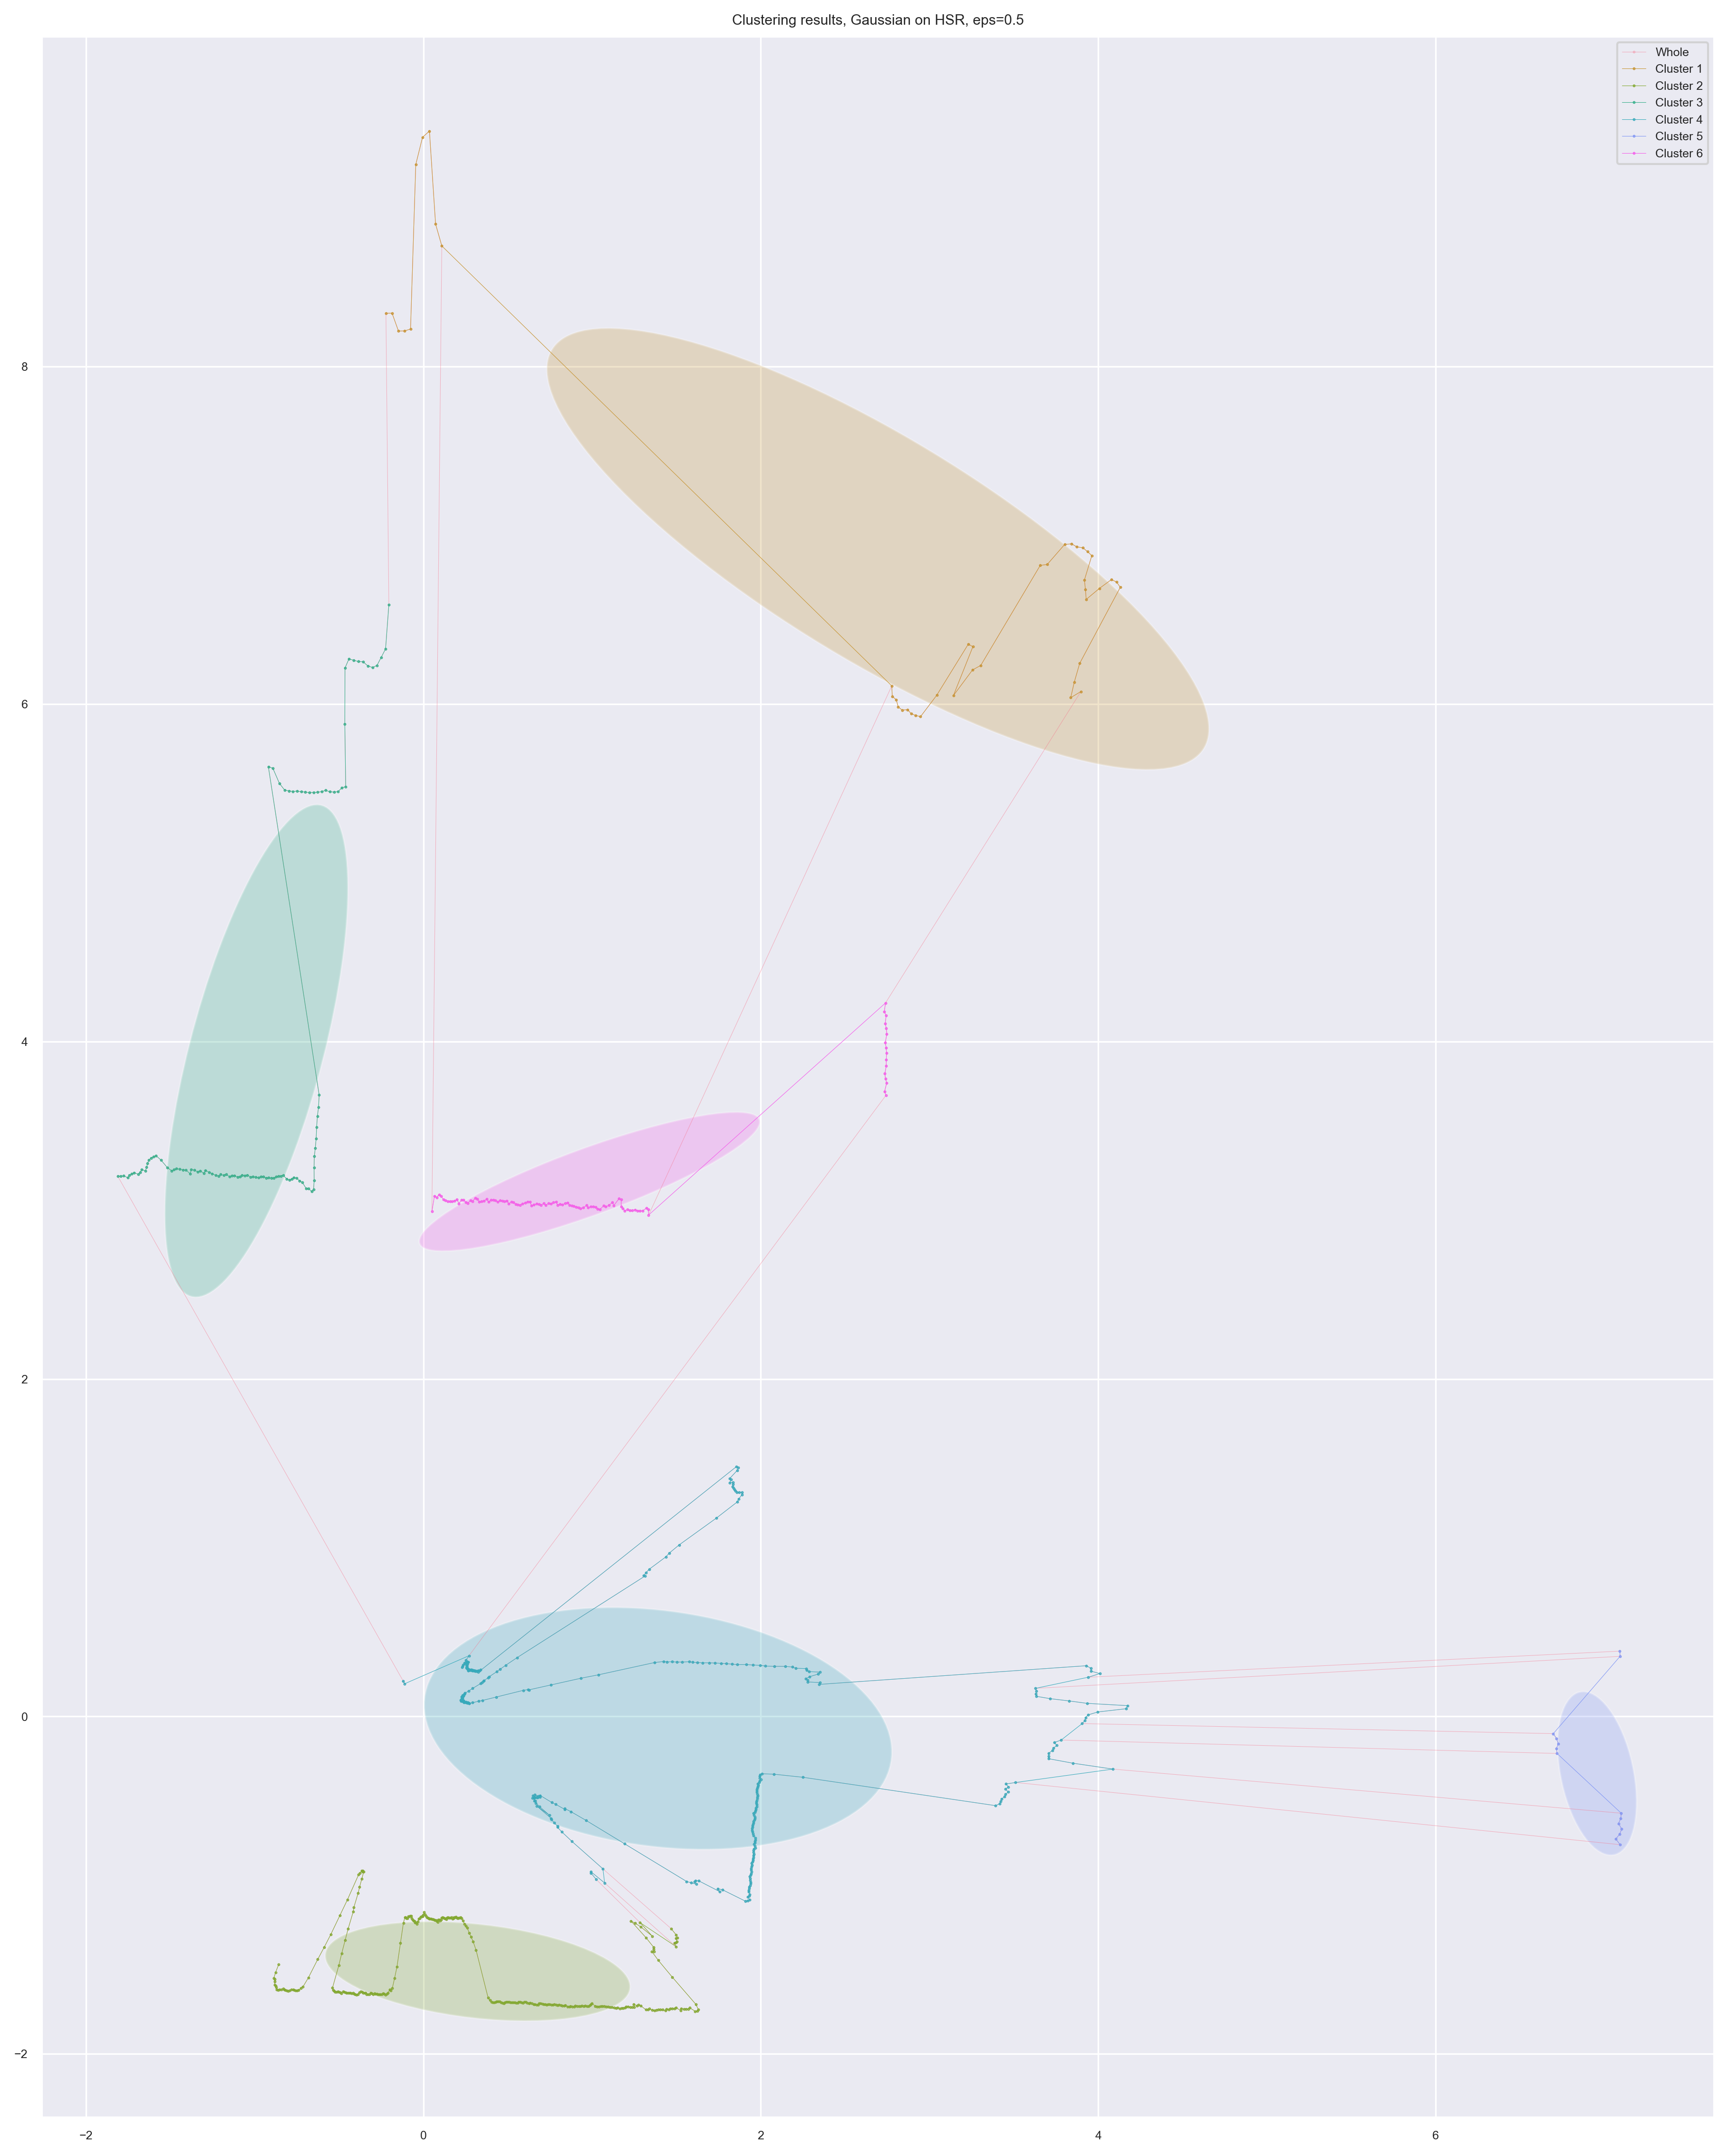

In [10]:
lbs = c(pts_hsr, approach='gaussian', n_components=6)
plot_cluster(pts_hsr, lbs, title='Gaussian on HSR, eps=0.5')



#### DBSCAN



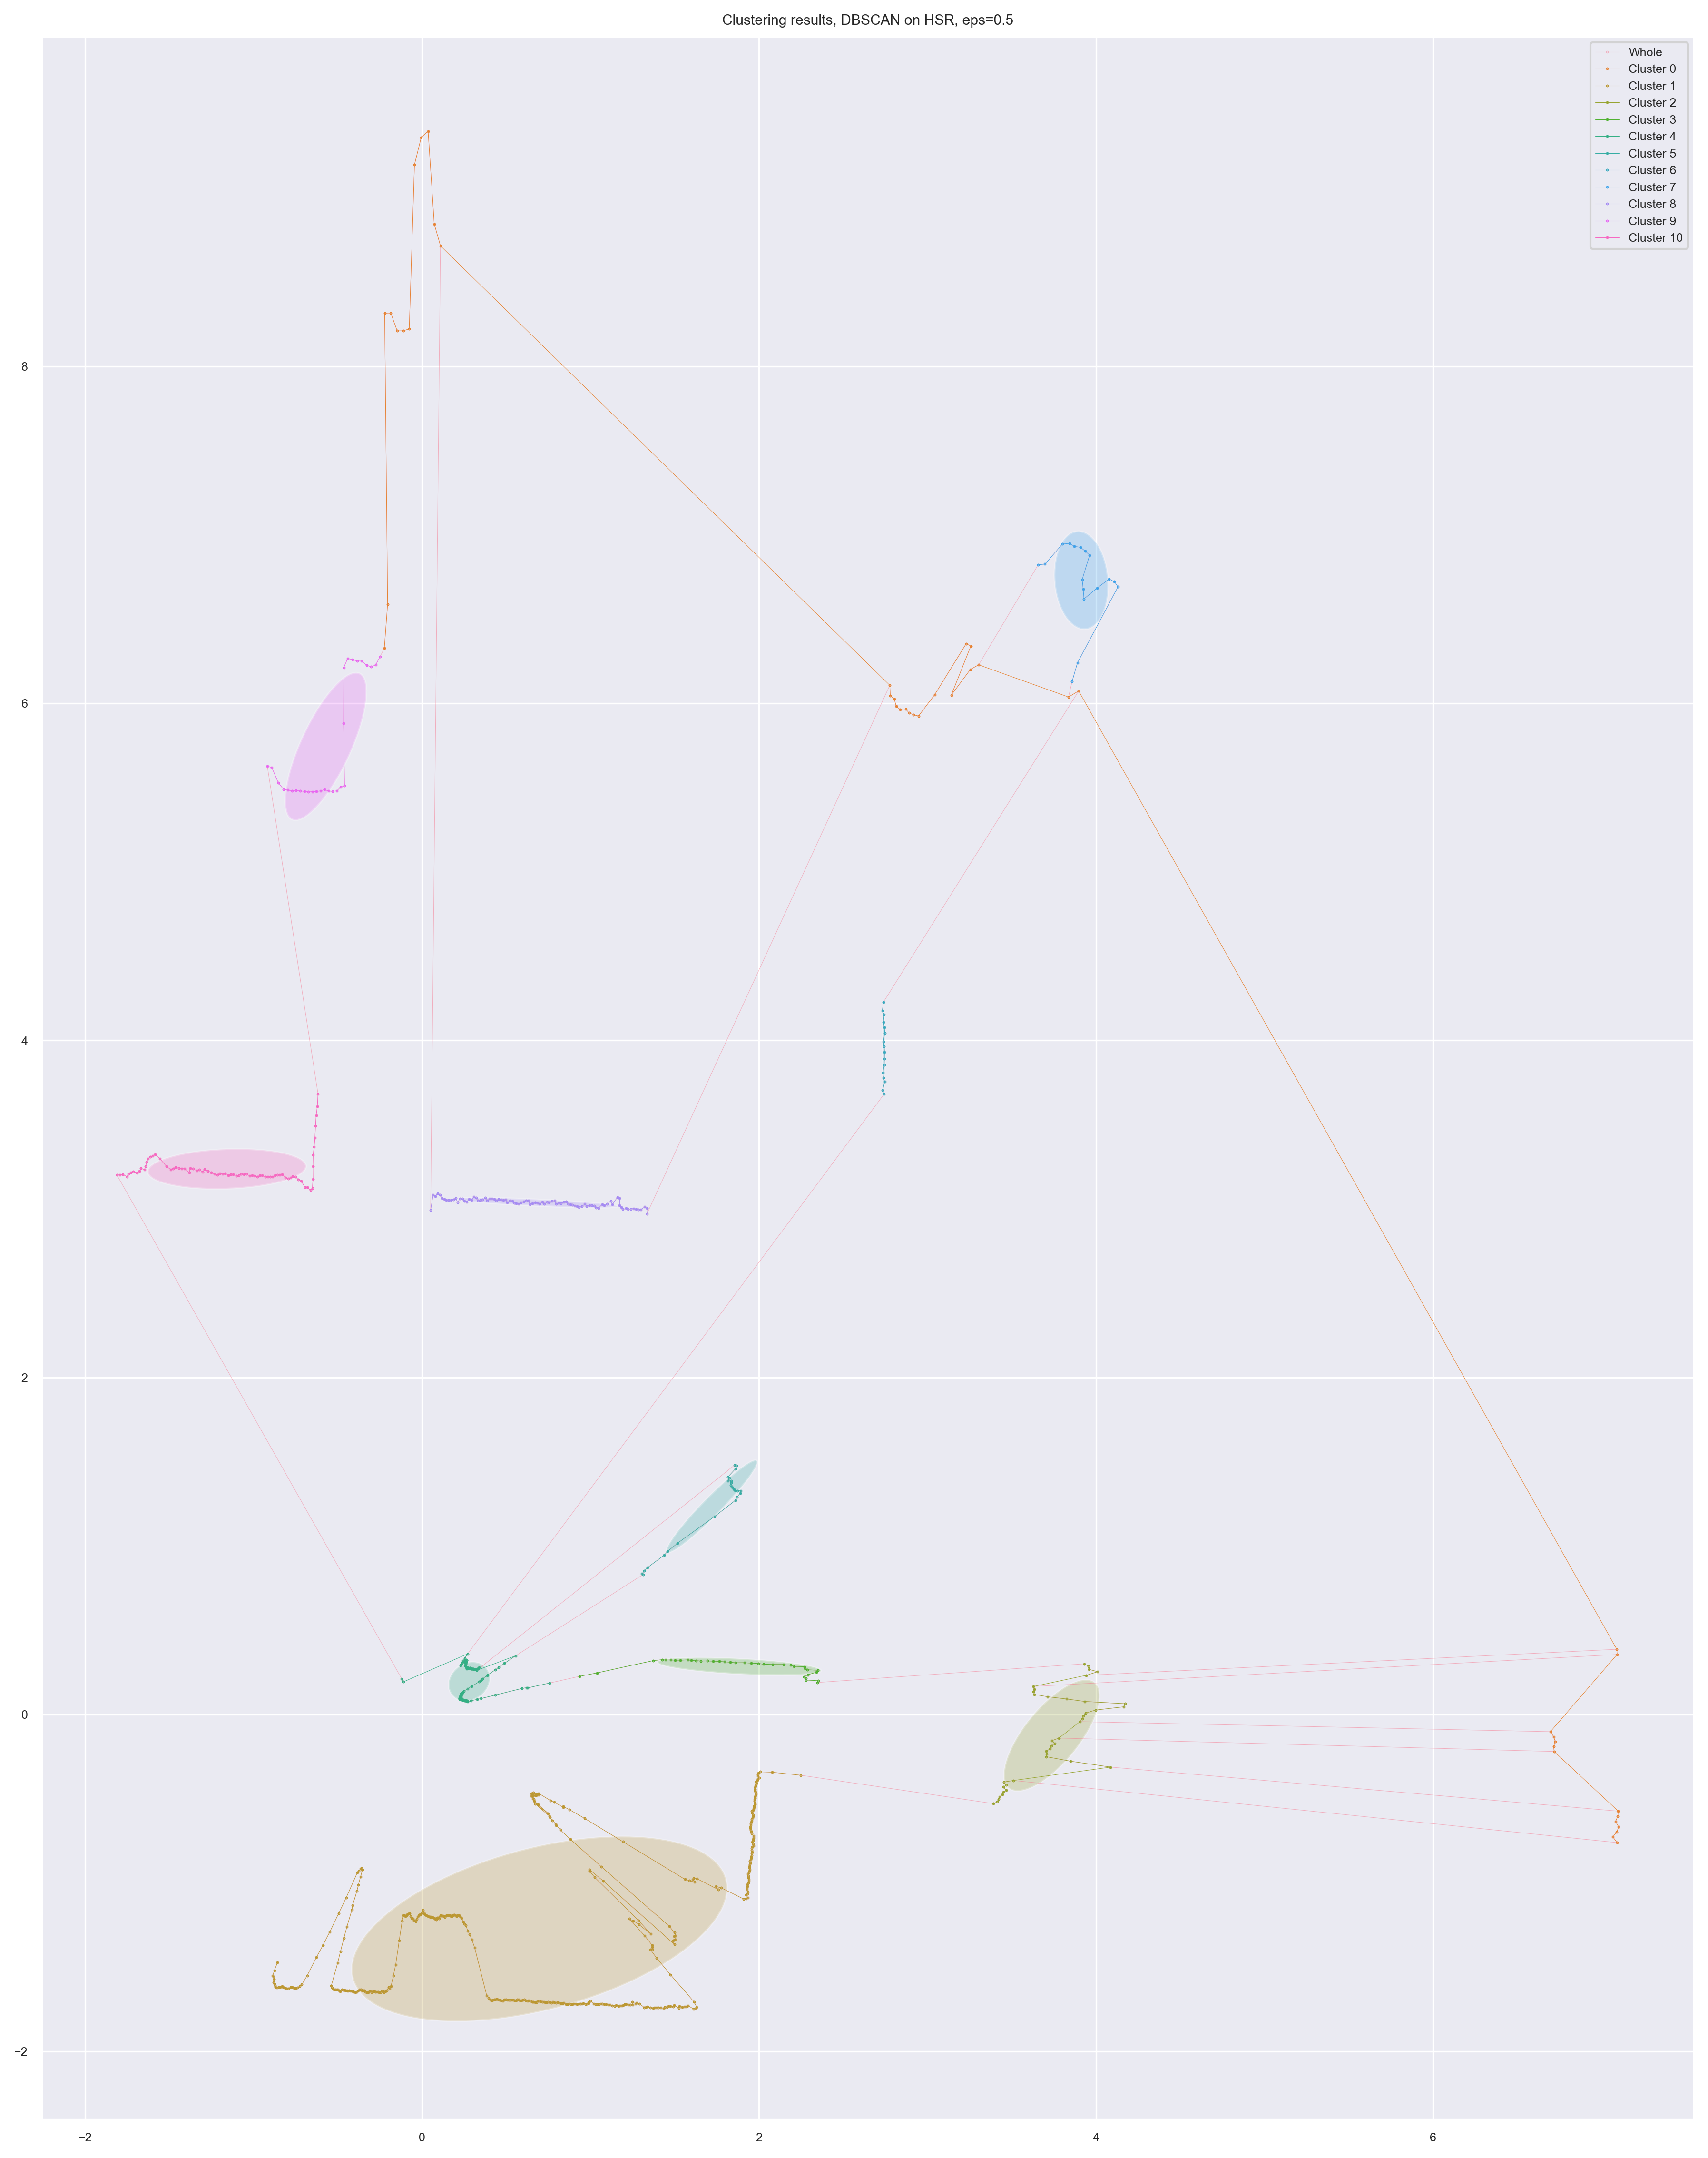

In [11]:
lbs = c(pts_hsr, approach='dbscan', eps=0.5, min_samples=16)
plot_cluster(pts_hsr, lbs, title='DBSCAN on HSR, eps=0.5')


### ICP with cluster translation initialisation


ic| 'Initial guess': 'Initial guess'
    init_tsf: array([[ 1.        , -0.        ,  1.93388482],
                     [ 0.        ,  1.        , -0.72910732],
                     [ 0.        ,  0.        ,  1.        ]])
ic| tsf_: array([[-8.85730201e-01, -4.64200400e-01,  7.24175053e+25],
                 [ 4.64200400e-01, -8.85730201e-01,  9.62096357e+25],
                 [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])
    tsl: array([7.24175053e+25, 9.62096357e+25])
    math.degrees(theta): 152.3415144386748


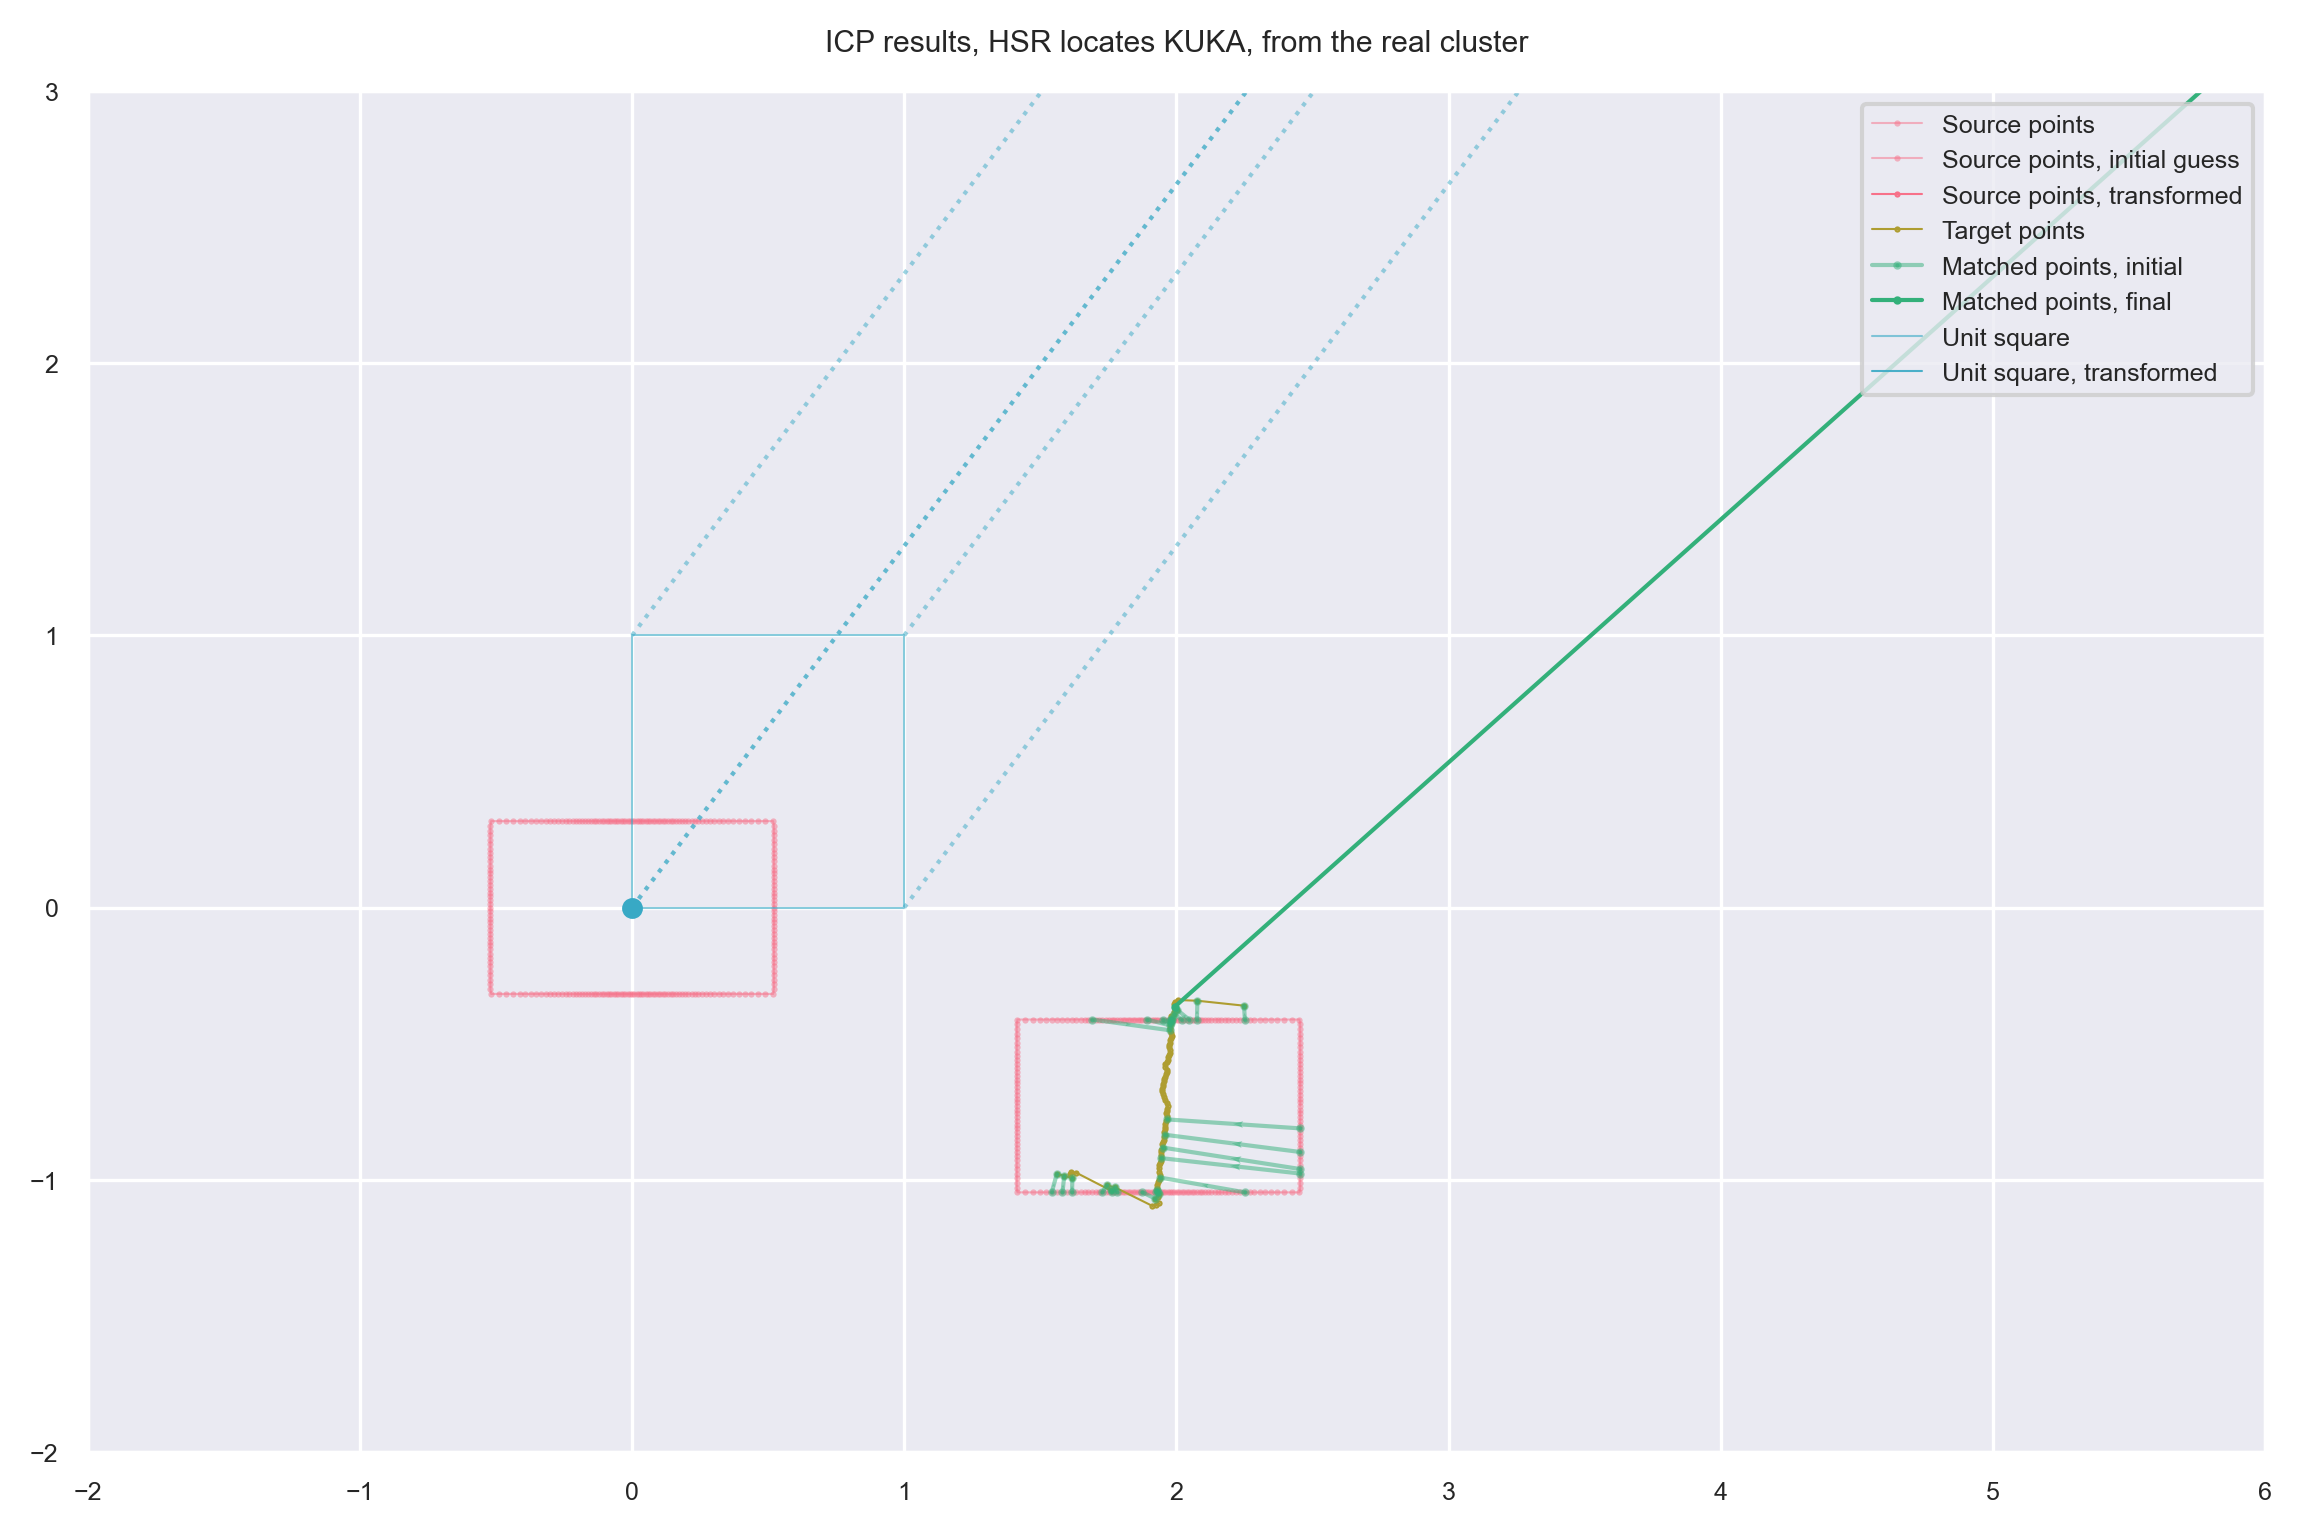

(array([[-8.85730201e-01, -4.64200400e-01,  1.81220428e+26],
        [ 4.64200400e-01, -8.85730201e-01,  1.47809181e+26],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]),
 [(array([[ 1.98417188, -0.41160732],
          [ 1.92557079, -1.04660732],
          [ 1.97568449, -0.41160732],
          [ 1.93388482, -1.04660732],
          [ 1.76149638, -1.04660732],
          [ 1.78244509, -1.04660732],
          [ 1.72769791, -1.04660732],
          [ 1.95052429, -0.41160732],
          [ 2.01895869, -0.41160732],
          [ 2.25138482, -0.41160732],
          [ 1.61638482, -1.04660732],
          [ 1.87503967, -1.04660732],
          [ 2.04631747, -0.41160732],
          [ 1.58126535, -1.04660732],
          [ 2.07524493, -0.41160732],
          [ 1.54180497, -1.04660732],
          [ 1.89208515, -0.41160732],
          [ 1.6902585 , -0.41160732],
          [ 2.25138482, -1.04660732],
          [ 2.45458482, -0.8115781 ],
          [ 2.45458482, -0.89829301],
          [ 2.454

In [12]:
lbs = c(pts_hsr, approach='hierarchical', distance_threshold=1)   # A good clustering result by empirical inspection
d_clusters = {lb: pts_hsr[np.where(lbs == lb)] for lb in np.unique(lbs)}

cls = d_clusters[11]  # The cluster indicating real location of KUKA

visualize(
    pcr_kuka, cls,
    title='HSR locates KUKA, from the real cluster',
    init_tsf=tsl_n_angle2tsf(tsl=cls.mean(axis=0)),
    xlim=[-2, 6], ylim=[-2, 3],
    save=True
)


#### What if start with good translation guess?
Like above, or a perfect one?

Now, relatively, there's too much noise in the KUKA point cloud representation instead


ic| 'Initial guess': 'Initial guess'
    init_tsf: array([[ 1. , -0. ,  2.5],
                     [ 0. ,  1. , -0.5],
                     [ 0. ,  0. ,  1. ]])
ic| tsf_: array([[   0.98148928,   -0.19151707,  -10.31765279],
                 [  -0.19151707,   -0.98148928, -132.63987626],
                 [   0.        ,    0.        ,    1.        ]])
    tsl: array([ -10.31765279, -132.63987626])
    math.degrees(theta): 11.041332056341068


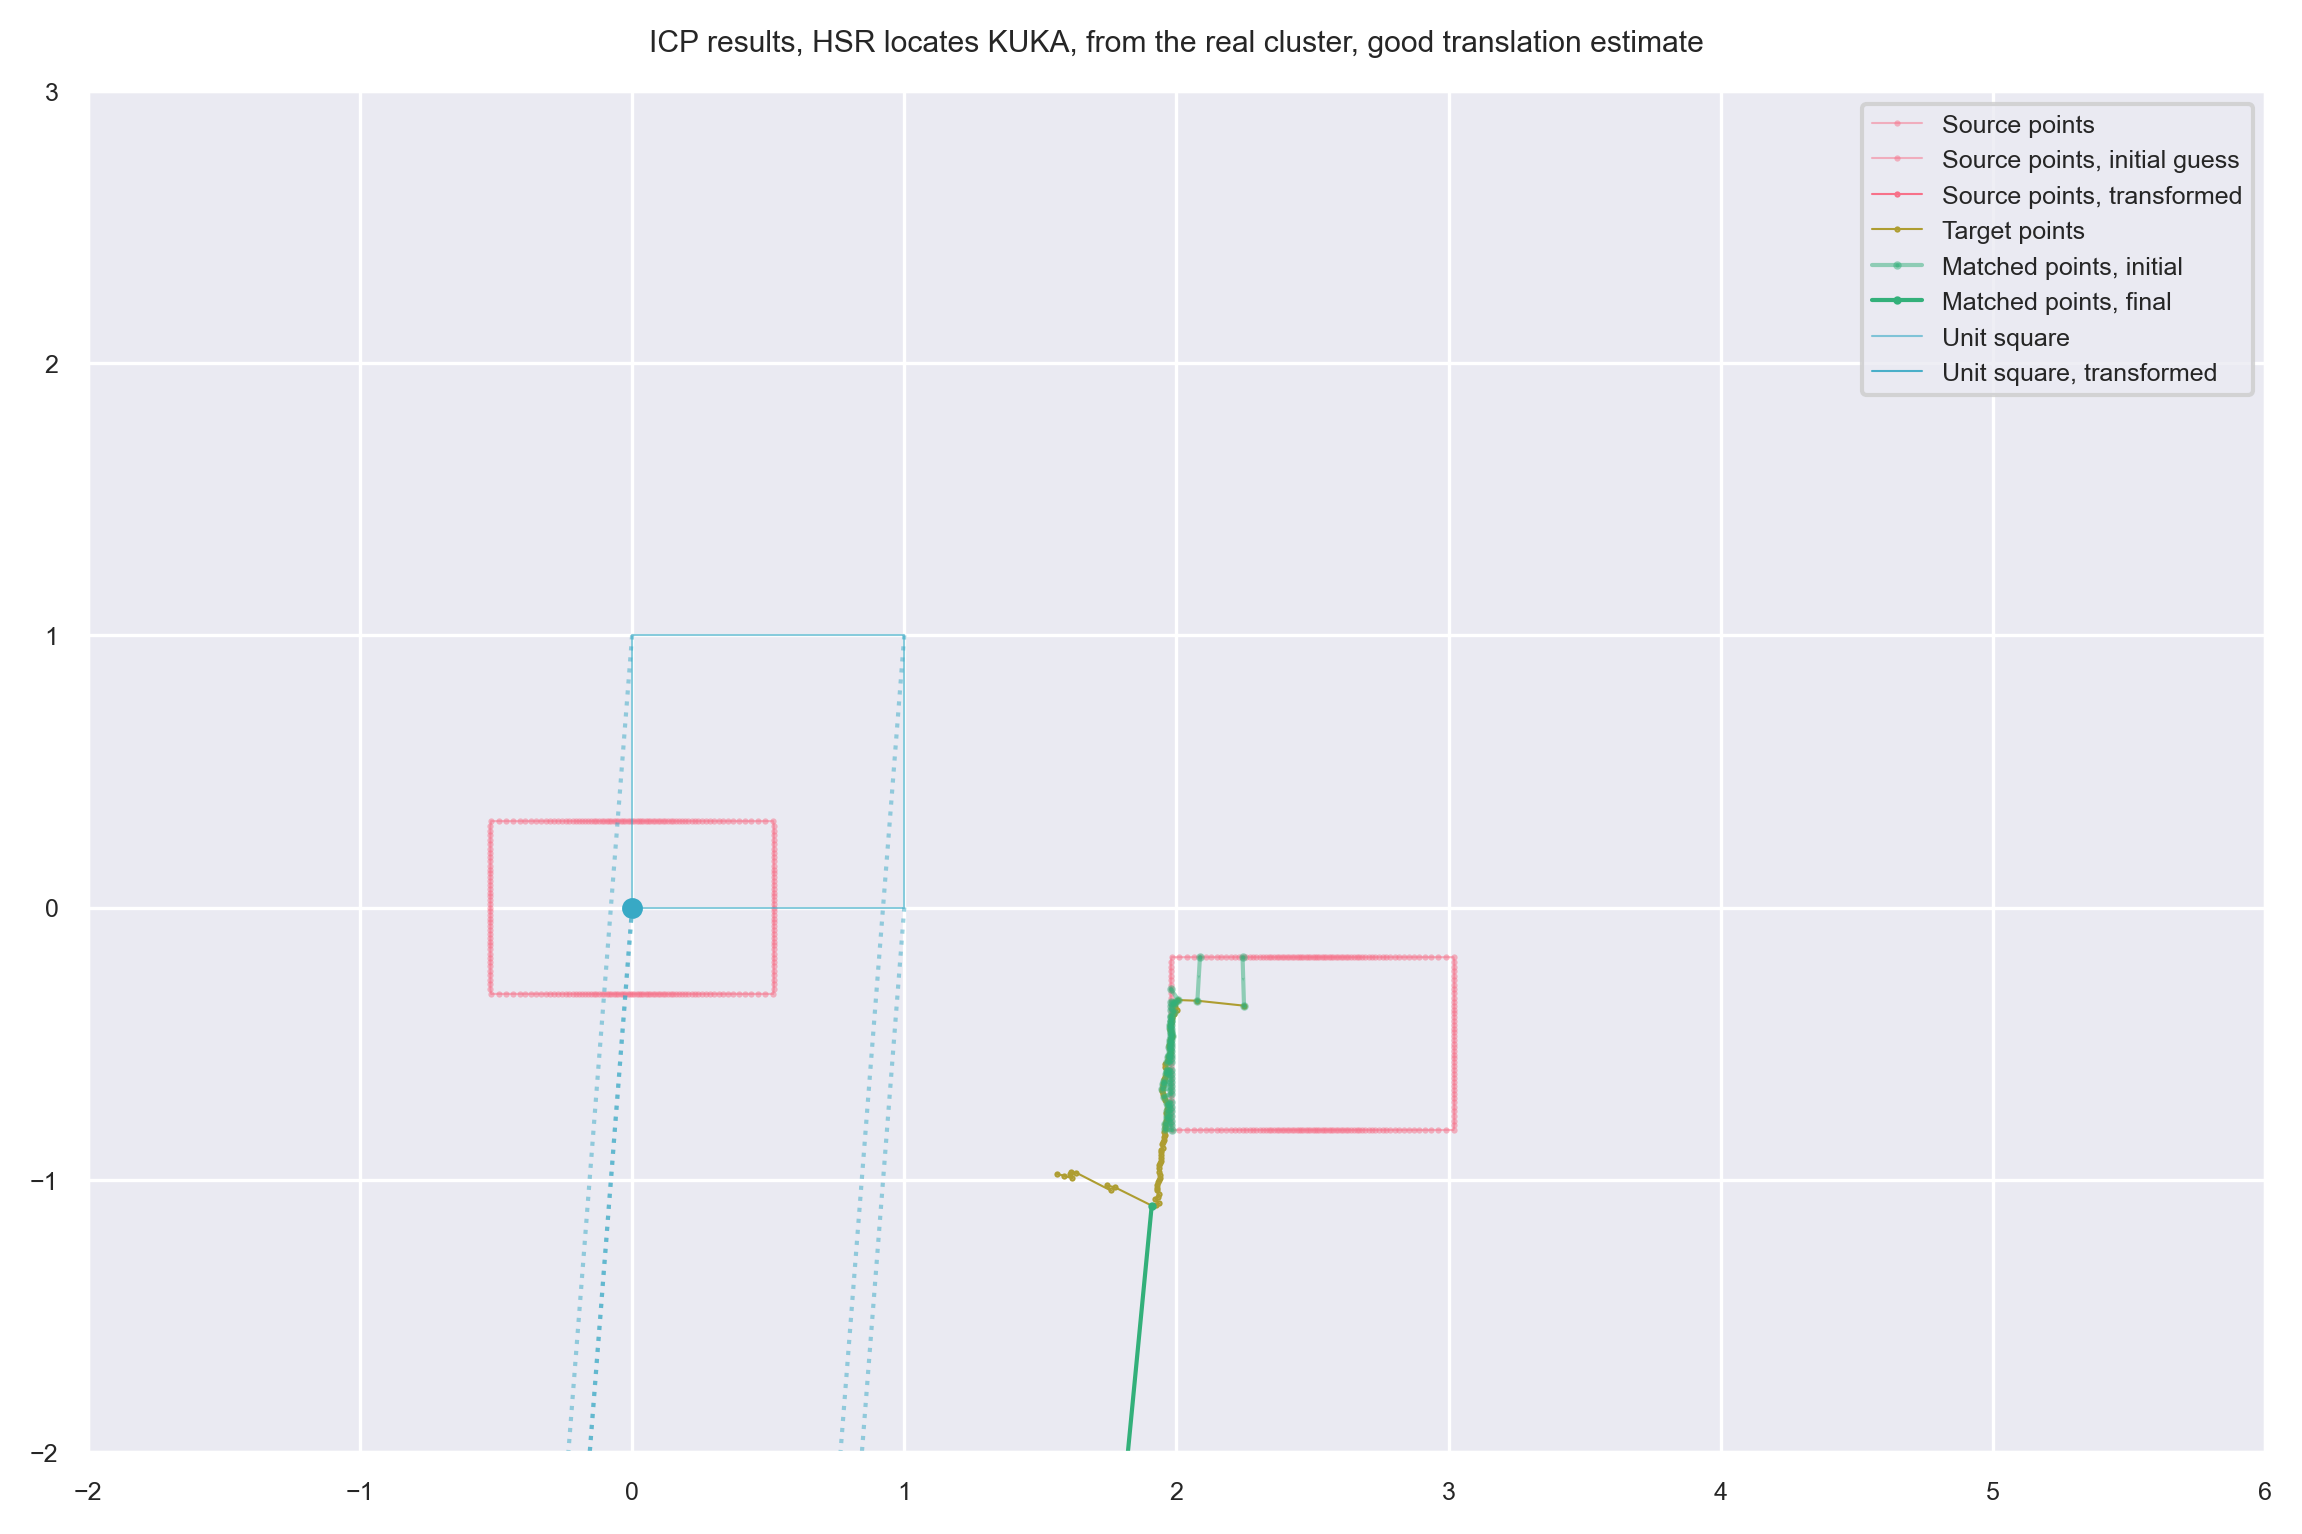

ic| 'Initial guess': 'Initial guess'
    init_tsf: array([[ 0.98877108,  0.14943813,  2.5       ],
                     [-0.14943813,  0.98877108, -0.75      ],
                     [ 0.        ,  0.        ,  1.        ]])
ic| tsf_: array([[-7.29241897e-01, -6.84255987e-01,  5.30590059e+24],
                 [ 6.84255987e-01, -7.29241897e-01,  1.34087756e+25],
                 [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])
    tsl: array([5.30590059e+24, 1.34087756e+25])
    math.degrees(theta): 136.82287721379896


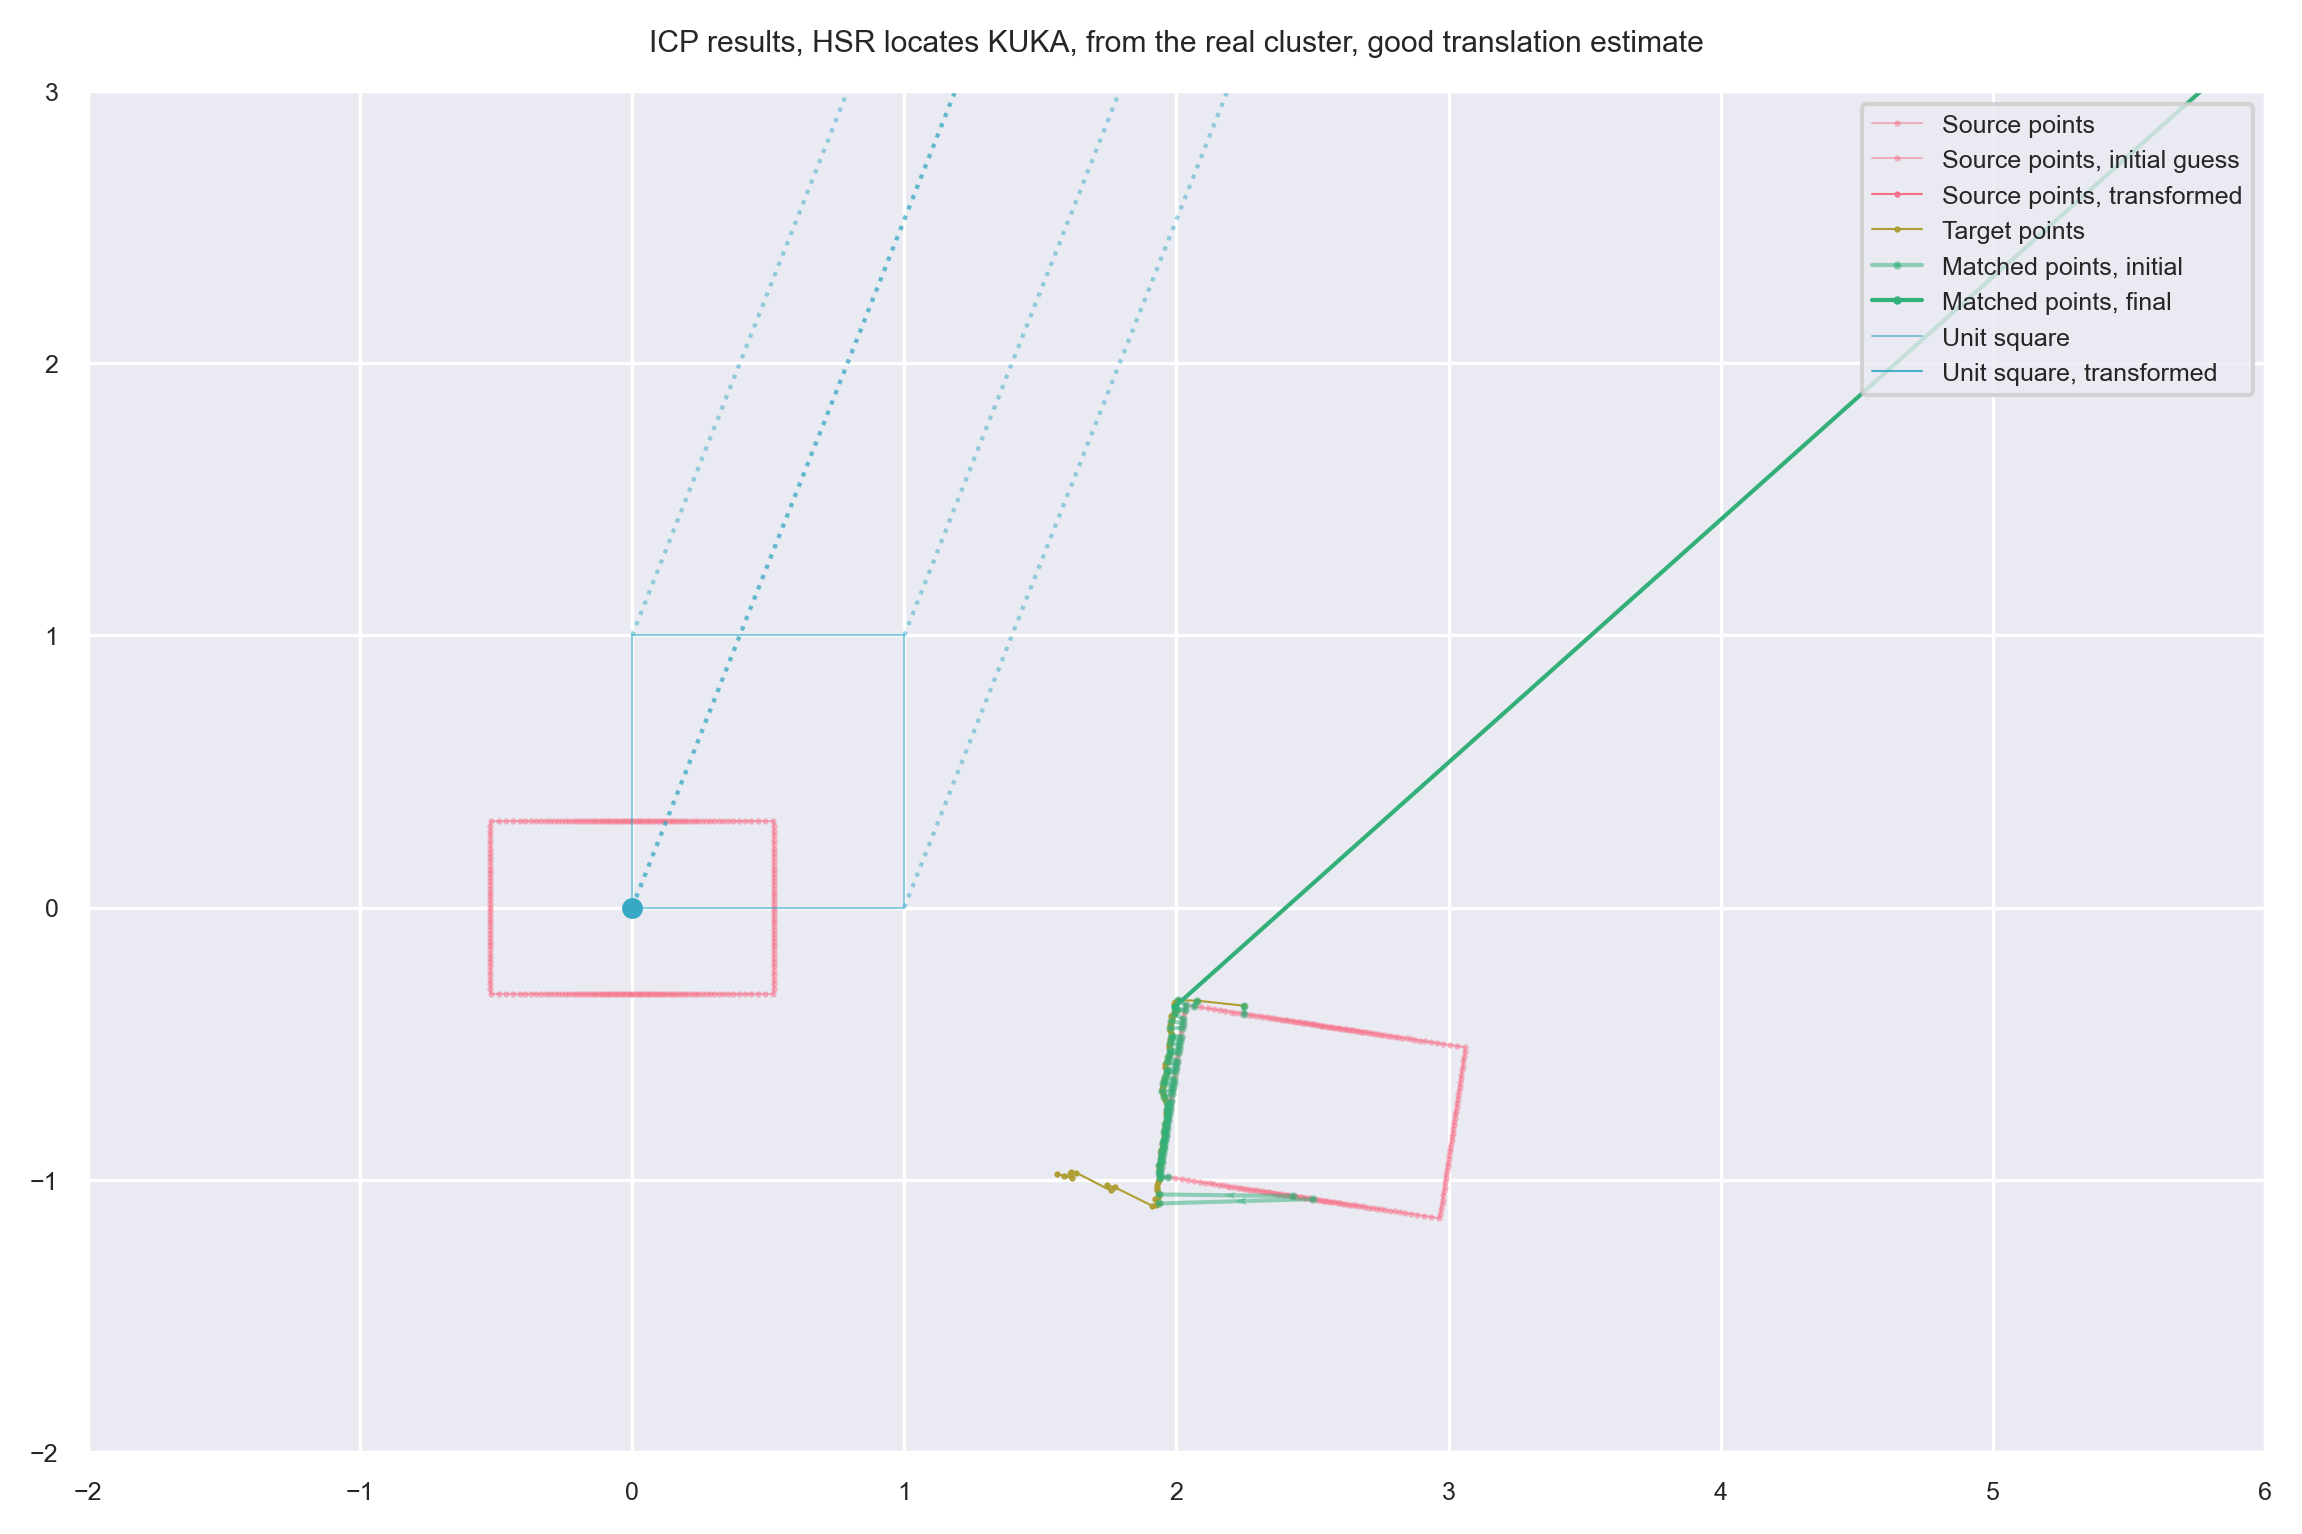

(array([[-7.29241897e-01, -6.84255987e-01,  1.83502206e+25],
        [ 6.84255987e-01, -7.29241897e-01,  1.95564223e+25],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]),
 [(array([[ 1.94022187, -0.96943814],
          [ 1.96860736, -0.78162297],
          [ 1.94549948, -0.93451832],
          [ 1.95759207, -0.85450661],
          [ 1.95986411, -0.83947348],
          [ 1.94803227, -0.9177599 ],
          [ 1.94025833, -0.98650899],
          [ 1.95291593, -0.8854467 ],
          [ 1.97072522, -0.76760995],
          [ 1.96209781, -0.824694  ],
          [ 1.95050257, -0.90141493],
          [ 1.96429712, -0.81014204],
          [ 1.97282262, -0.75373228],
          [ 1.9552775 , -0.86982115],
          [ 1.96646579, -0.79579286],
          [ 1.97696848, -0.72630081],
          [ 1.9749027 , -0.73996926],
          [ 1.94289819, -0.95172999],
          [ 1.97902293, -0.71270738],
          [ 2.06402938, -0.36300381],
          [ 2.03007193, -0.37493699],
          [ 1.969

In [13]:
visualize(
    pcr_kuka, cls,
    title='HSR locates KUKA, from the real cluster, good translation estimate',
    init_tsf=tsl_n_angle2tsf(guesses['good_no_rotation']),
    xlim=[-2, 6], ylim=[-2, 3], mode='static',
    save=True
)
visualize(
    pcr_kuka, cls,
    title='HSR locates KUKA, from the real cluster, good translation estimate',
    init_tsf=tsl_n_angle2tsf(guesses['actual_pose']),
    xlim=[-2, 6], ylim=[-2, 3], mode='static',
    save=True
)


#### On top of translation guess, reverse?



ic| 'Initial guess': 'Initial guess'
    init_tsf: array([[ 1. , -0. , -2.5],
                     [ 0. ,  1. ,  0.5],
                     [ 0. ,  0. ,  1. ]])
ic| tsf_: array([[ 0.99738895, -0.07221688, -2.52595887],
                 [ 0.07221688,  0.99738895,  0.5194569 ],
                 [ 0.        ,  0.        ,  1.        ]])
    tsl: array([-2.52595887,  0.5194569 ])
    math.degrees(theta): 4.141327379332864


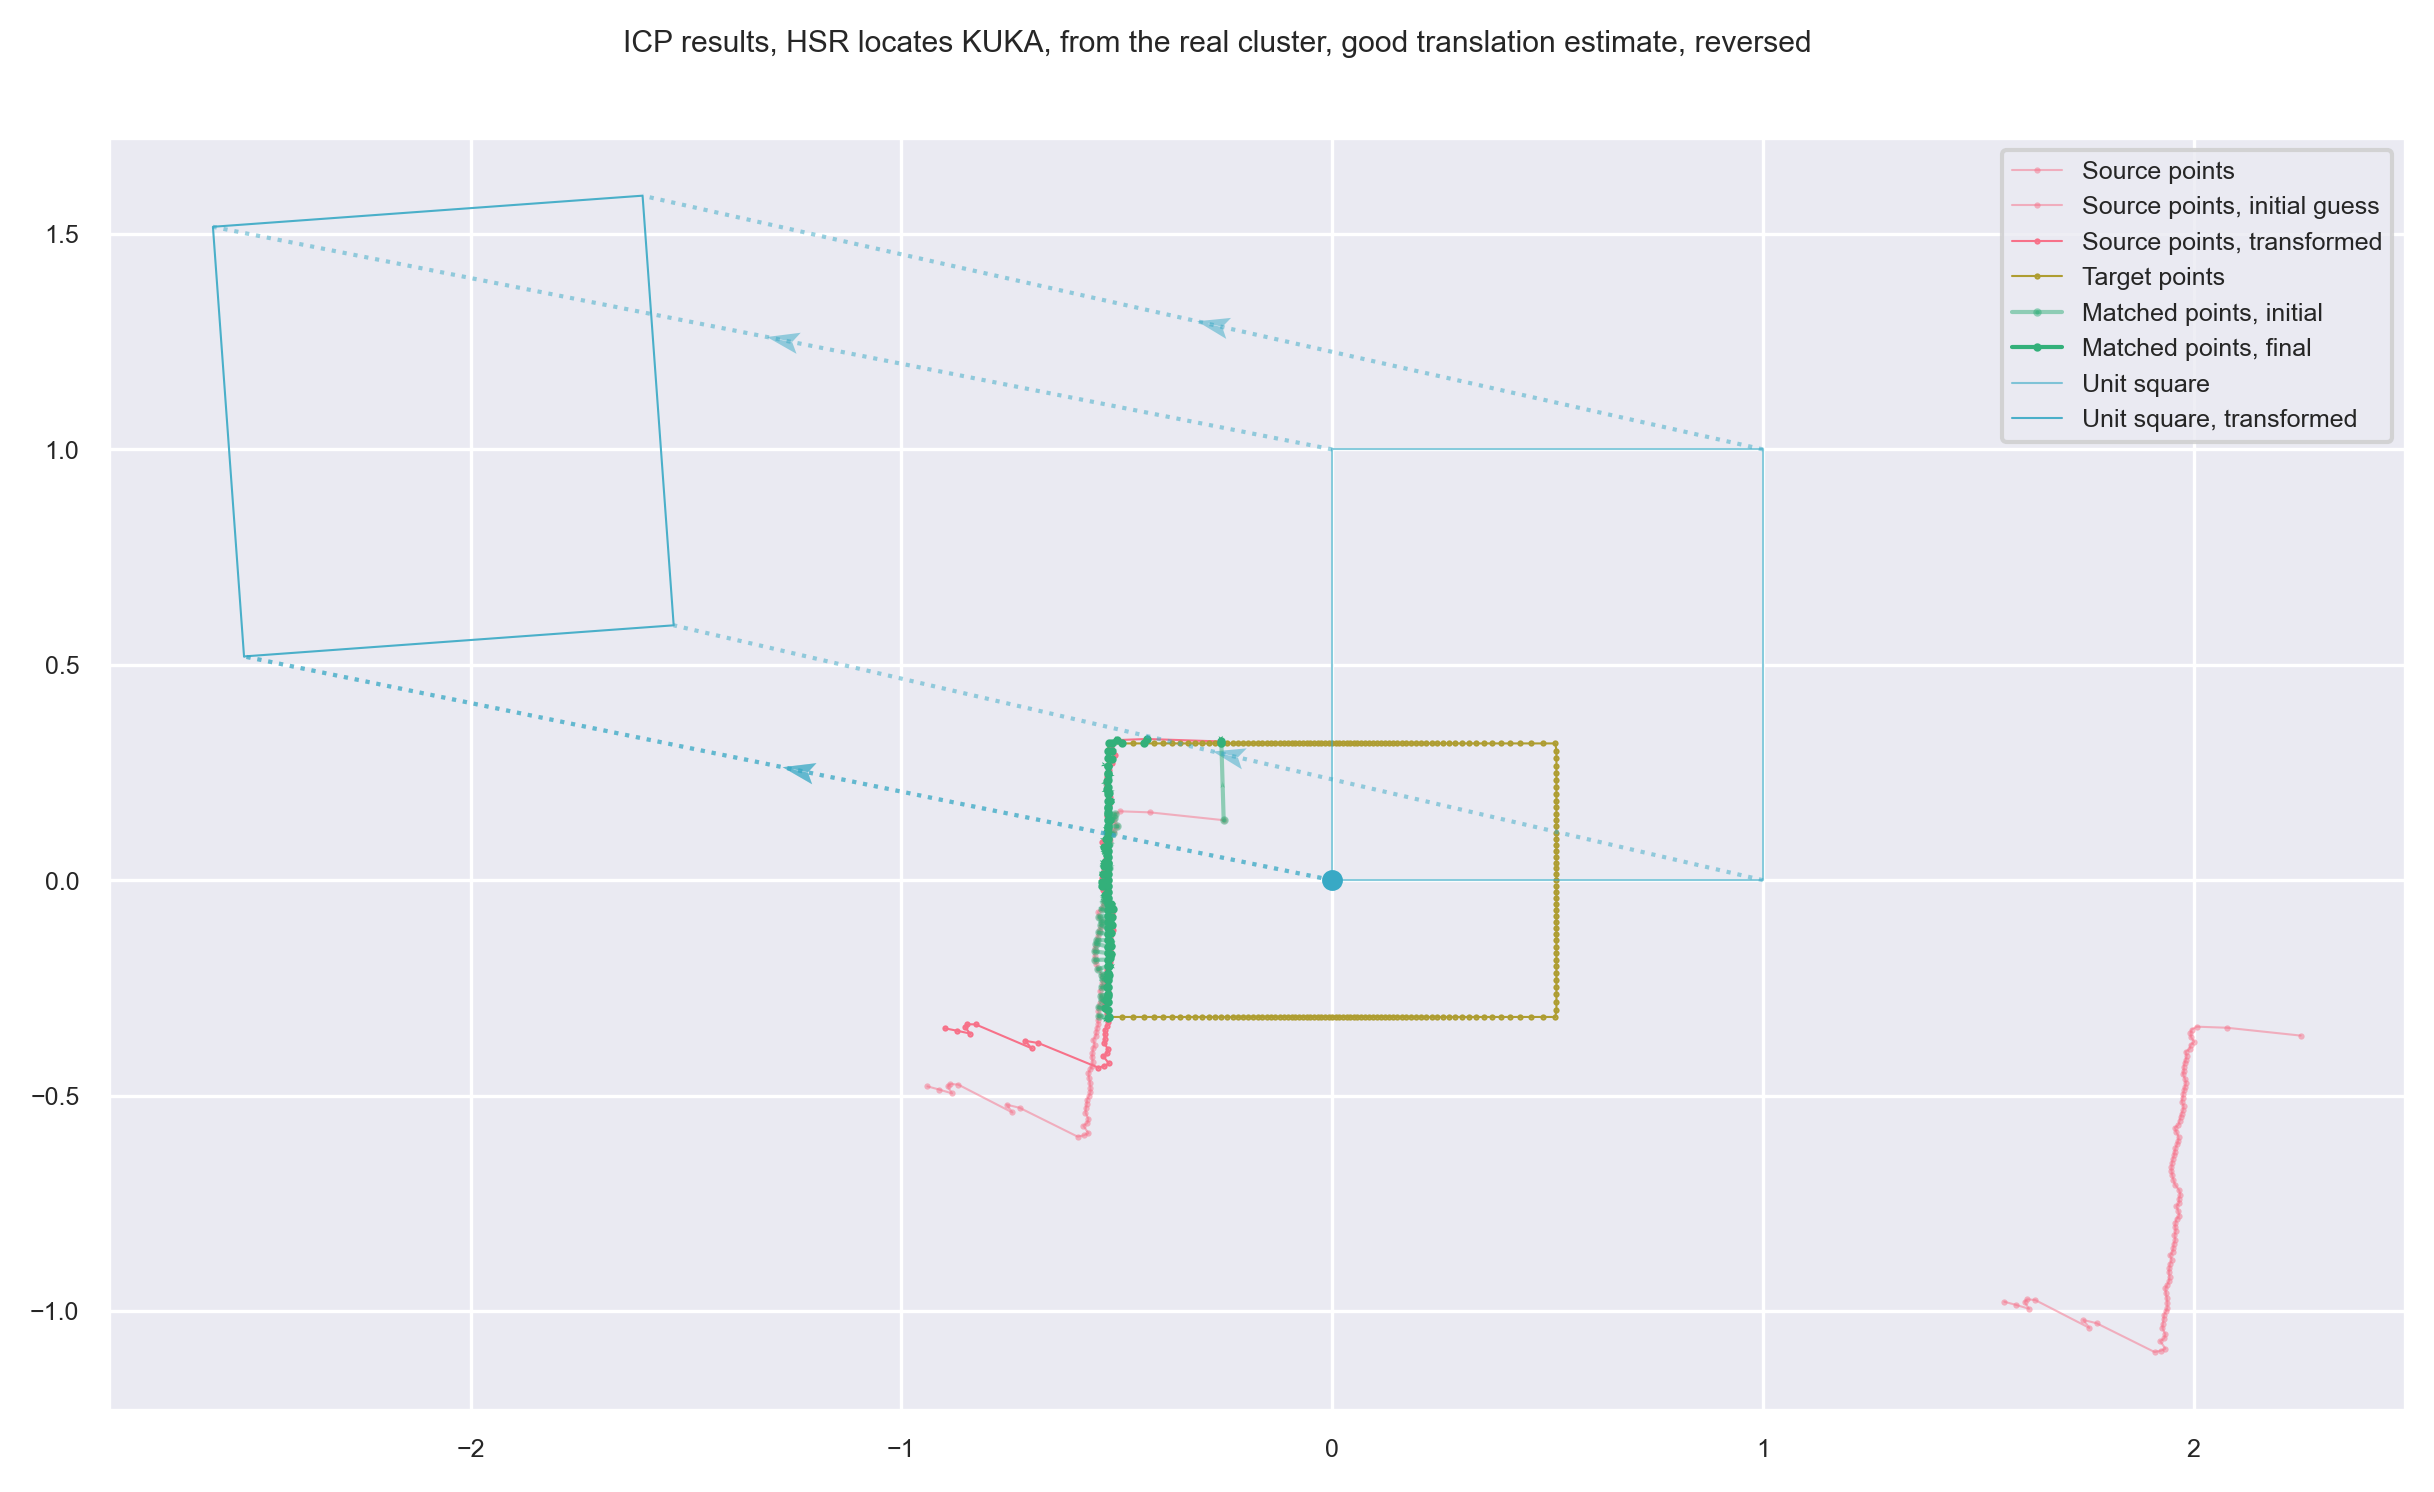

ic| np.linalg.inv(tsf): array([[ 0.99739198,  0.07217507,  2.48204374],
                               [-0.07217507,  0.99739198, -0.69991149],
                               [ 0.        ,  0.        ,  1.        ]])


array([[ 0.99739198,  0.07217507,  2.48204374],
       [-0.07217507,  0.99739198, -0.69991149],
       [ 0.        ,  0.        ,  1.        ]])

In [14]:
x, y = guesses['good_no_rotation']


tsf, states = visualize(
    cls, pcr_kuka,
    title='HSR locates KUKA, from the real cluster, good translation estimate, reversed',
    init_tsf=tsl_n_angle2tsf([-x, -y]),
    # xlim=[-2, 6], ylim=[-2, 3], mode='static',
    # save=True
)
ic(np.linalg.inv(tsf))


## Run ICP with proposed initial position
See `explore_transformation_init.ipynb`


### Setup

In [15]:
d_cls_res = config('heuristics.cluster_results.good')
lbs = d_cls_res['labels']
d_clusters = d_cls_res['clusters']
d_clusters = {int(k): v for k, v in d_clusters.items()}



### How does it work on the cluster with actual pose?



In [16]:
pts_cls = d_clusters[11]

ti = TsfInitializer()
cands = ti.rect_tsf_cands(pts_cls, kwargs_cands=dict(return_mat=False))
cand = cands[0]  # This one is close to the hand-selected good initial transformation
cand



(2.477340945540485, -0.7557738508641236, -0.08957646955837384)

#### How exactly do I take the inverse?


ic| 'Initial guess': 'Initial guess'
    init_tsf: array([[ 0.99599071, -0.08945672, -2.53501762],
                     [ 0.08945672,  0.99599071,  0.53112893],
                     [ 0.        ,  0.        ,  1.        ]])
ic| tsf_: array([[ 0.99741676, -0.07183183, -2.52773494],
                 [ 0.07183183,  0.99741676,  0.51264569],
                 [ 0.        ,  0.        ,  1.        ]])
    tsl: array([-2.52773494,  0.51264569])
    math.degrees(theta): 4.119208293322711


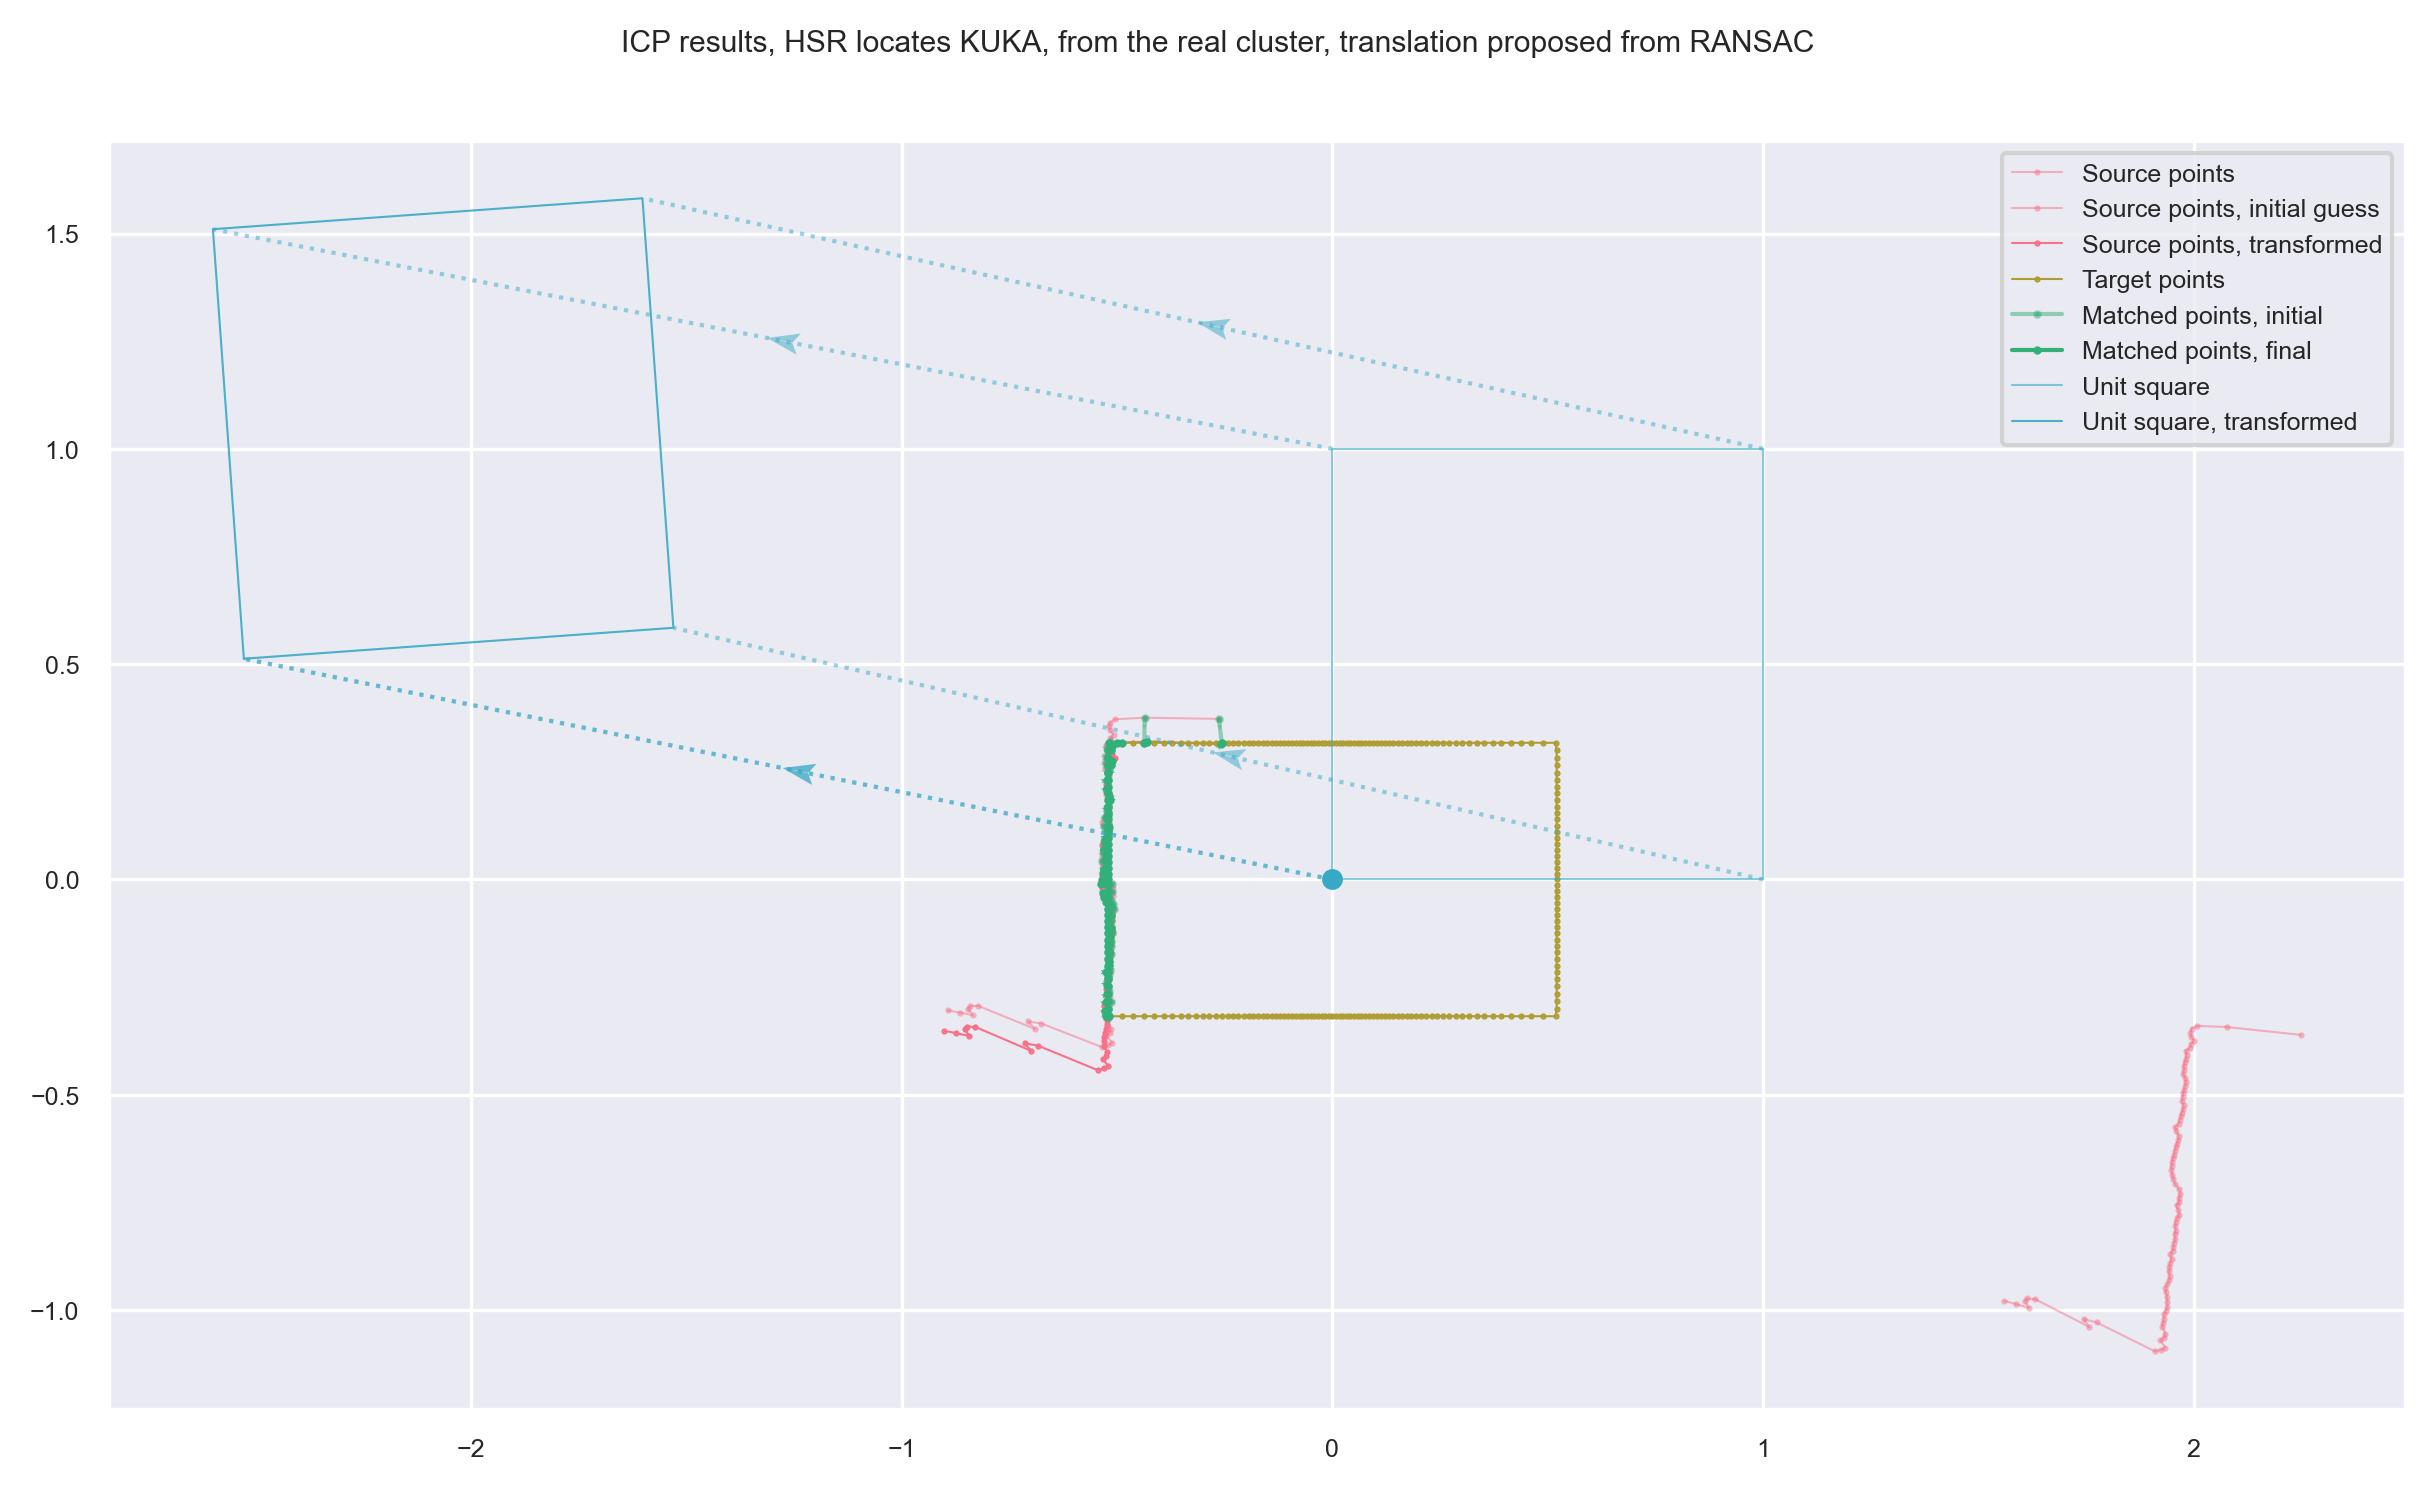

(array([[ 0.99704755, -0.07678654, -2.52582835],
        [ 0.07678654,  0.99704755,  0.51581949],
        [ 0.        ,  0.        ,  1.        ]]),
 [(array([[-0.5213601 , -0.30147179],
          [-0.52028088, -0.23081073],
          [-0.52027952,  0.23079723],
          [-0.52169916,  0.24892731],
          [-0.51941775,  0.18561123],
          [-0.52250638,  0.16805342],
          [-0.52140622, -0.25051645],
          [-0.51894909, -0.20132762],
          [-0.51706278,  0.31970652],
          [-0.52295692,  0.30257455],
          [-0.5229742 ,  0.21324522],
          [-0.51829756, -0.18172516],
          [-0.52330366,  0.00253966],
          [-0.5183179 , -0.26184743],
          [-0.52339168,  0.2043178 ],
          [-0.52485596,  0.11392515],
          [-0.51653045, -0.21218166],
          [-0.51510579, -0.28351214],
          [-0.52601854,  0.28516469],
          [-0.52224932, -0.32172525],
          [-0.5148314 , -0.15336811],
          [-0.52625599,  0.26740028],
          [-0.5

In [17]:
visualize(
    pts_cls, pcr_kuka,
    title='HSR locates KUKA, from the real cluster, translation proposed from RANSAC',
    init_tsf=np.linalg.inv(tsl_n_angle2tsf(cand))
)


#### Try to visualize the errors for all proposed transformations


##### Looks like there's too many points clustered together



ic| err_by_tsl.shape: (51, 3)
    err_by_tsl[:5]: array([[ 0.73001446, -0.05553317,  0.0667029 ],
                           [ 0.55834359,  0.05318367,  0.07887082],
                           [-0.14979876,  0.50164064,  0.09371665],
                           [ 0.02187212,  0.3929238 ,  0.087226  ],
                           [ 0.2341127 , -0.30989145,  0.11345738]])


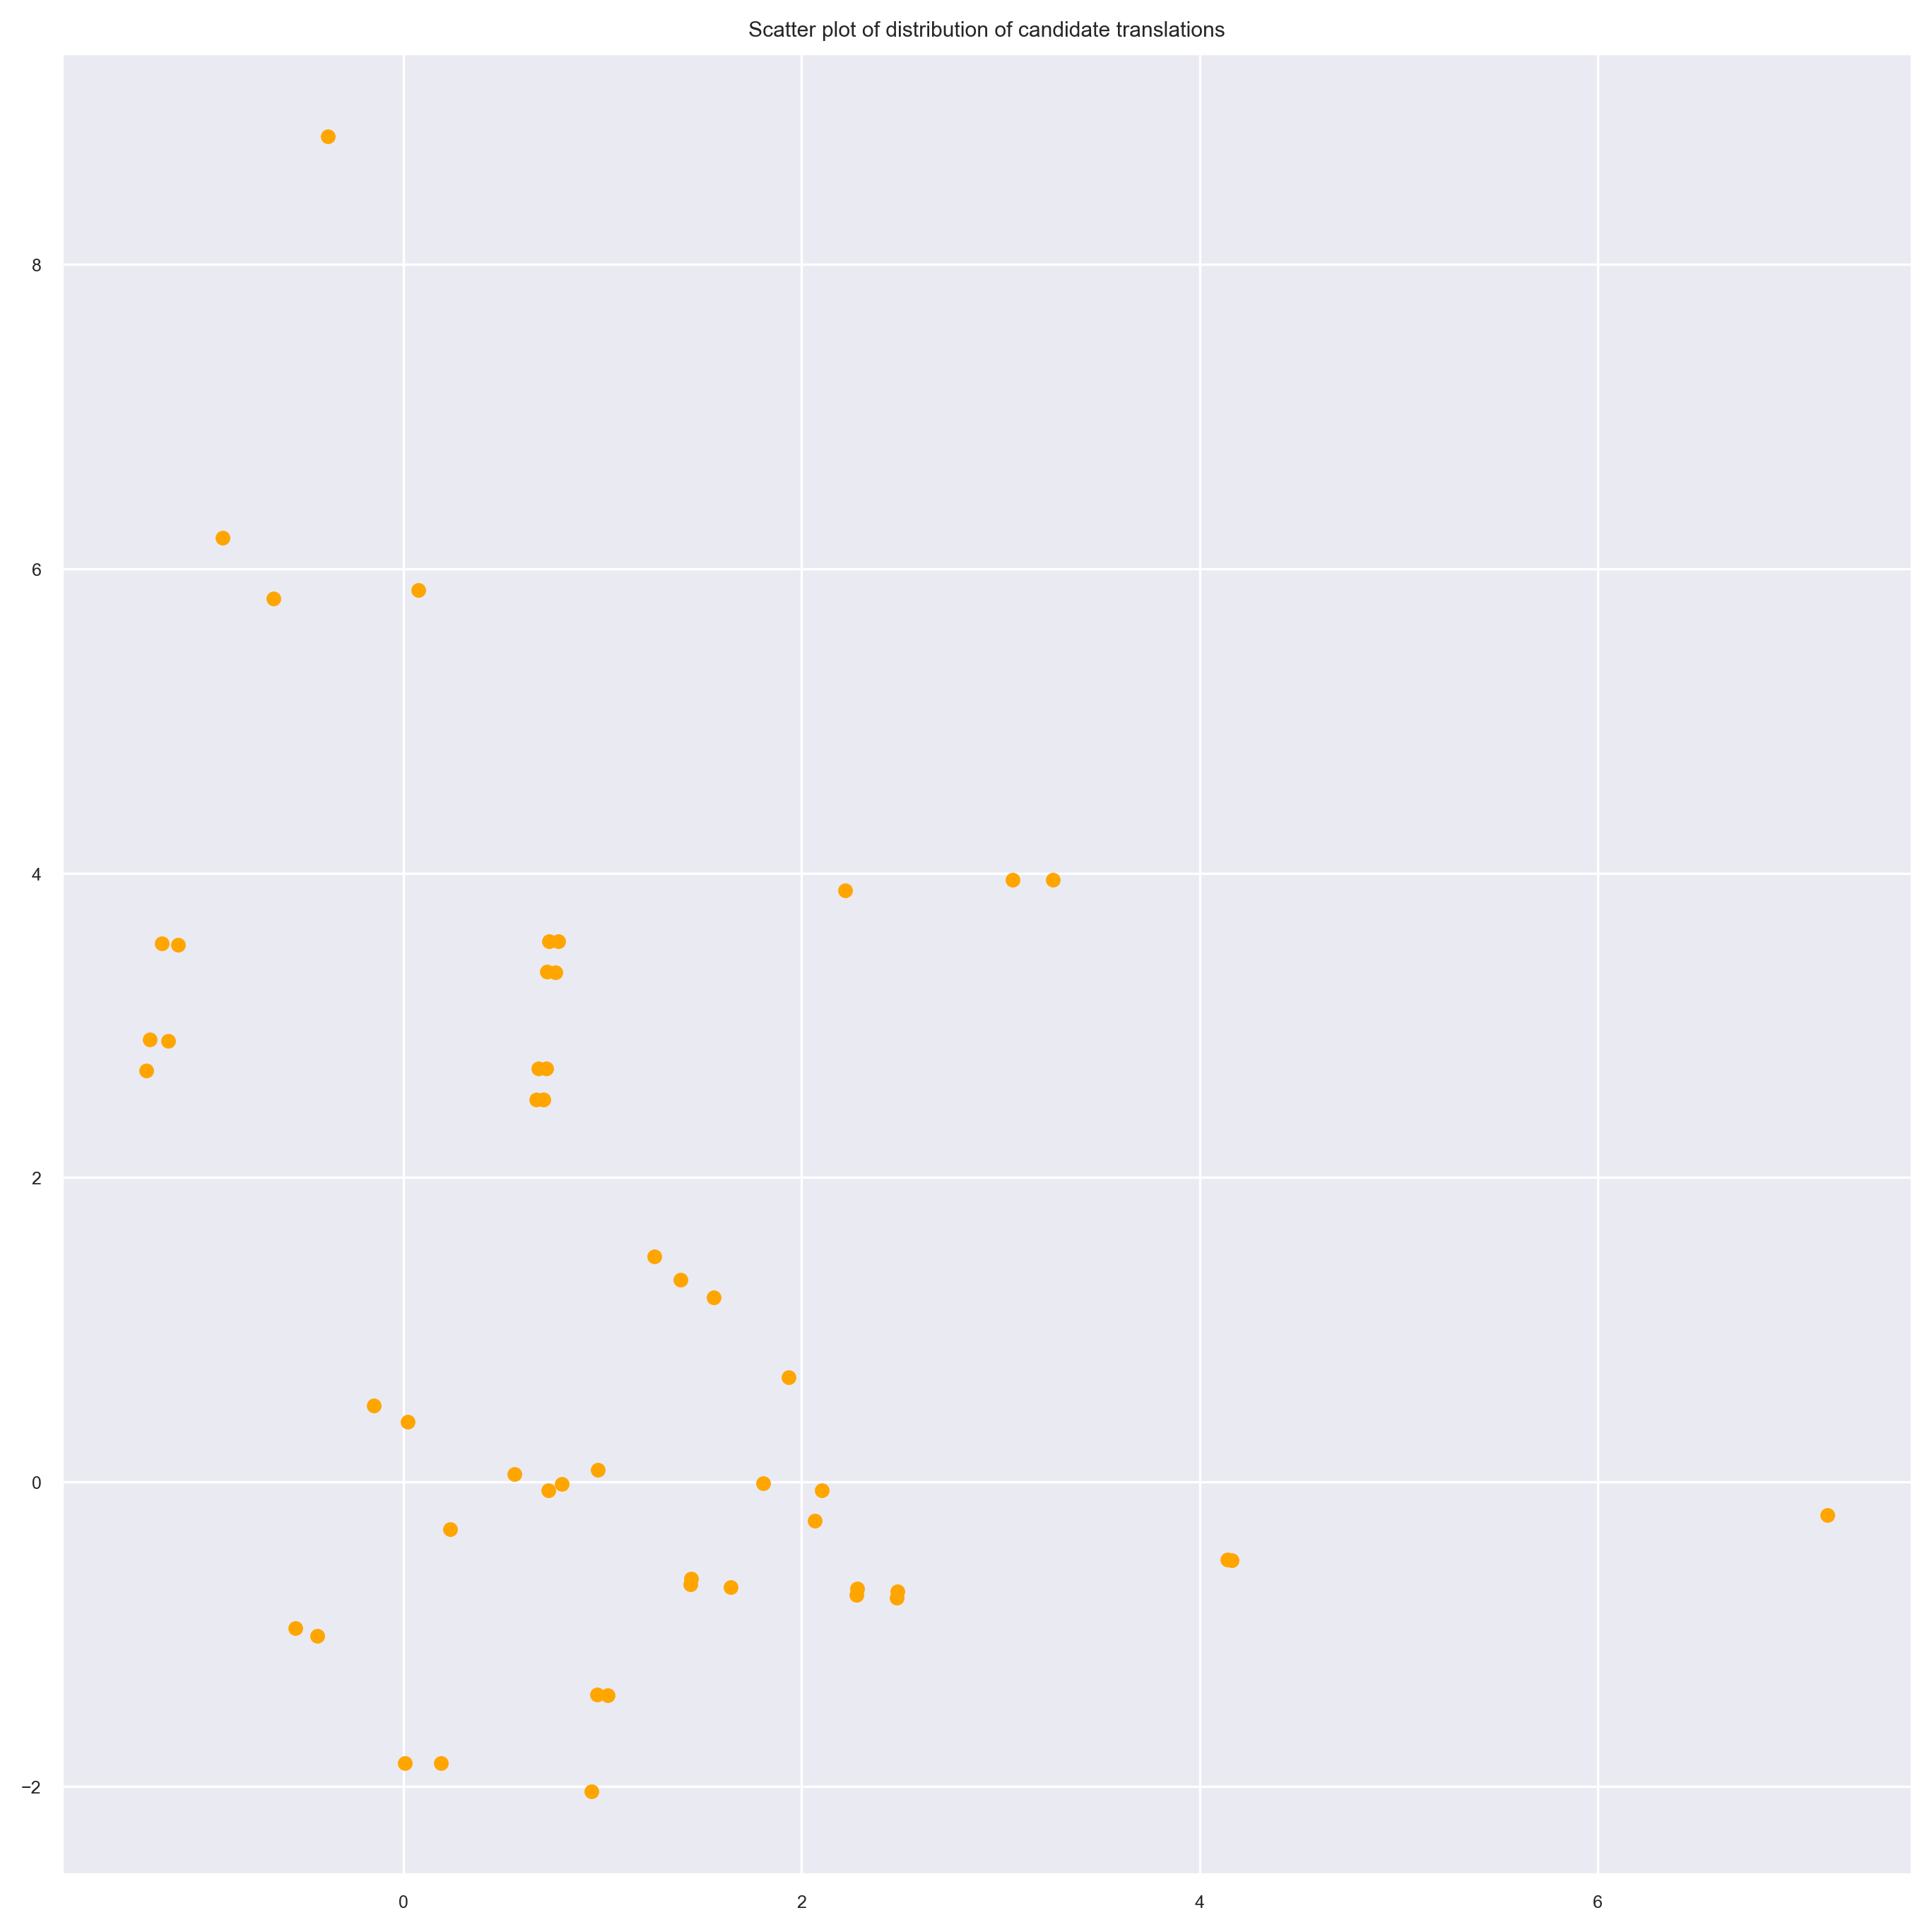

In [18]:
ti = TsfInitializer()
d_tsfs = ti.rect_tsf_cands(pts_hsr, labels=lbs, kwargs_cands=dict(rect_dim=dim_kuka, return_mat=False))
err_by_tsl = []
for label, tsfs in d_tsfs.items():
    pts_cls = d_clusters[label]
    for tsf in tsfs:
        tsf_ = np.linalg.inv(tsl_n_angle2tsf(tsf))
        src, tgt = pts_cls, pcr_kuka
        tsf_ = Icp(src, tgt)(tsf_)
        error = Loss(tgt).pose_error(src, tsf_, is_mat=True)
        err_by_tsl.append((*tsf[:2], error))
err_by_tsl = np.array(err_by_tsl)
err_thresh = 0.5  # Remove noise, exploding error
err_by_tsl = err_by_tsl[err_by_tsl[:, 2] < err_thresh]
ic(err_by_tsl.shape, err_by_tsl[:5])

x, y, z = err_by_tsl[:, 0], err_by_tsl[:, 1], err_by_tsl[:, 2]

plt.figure(figsize=(9, 9))
plot_points(np.stack([x, y]).T, lw=0, ms=8)
plt.title('Scatter plot of distribution of candidate translations')
plt.show()



##### Pick the point with the best loss, if a bunch of points are close to each other
And this seems to remove meaningful information



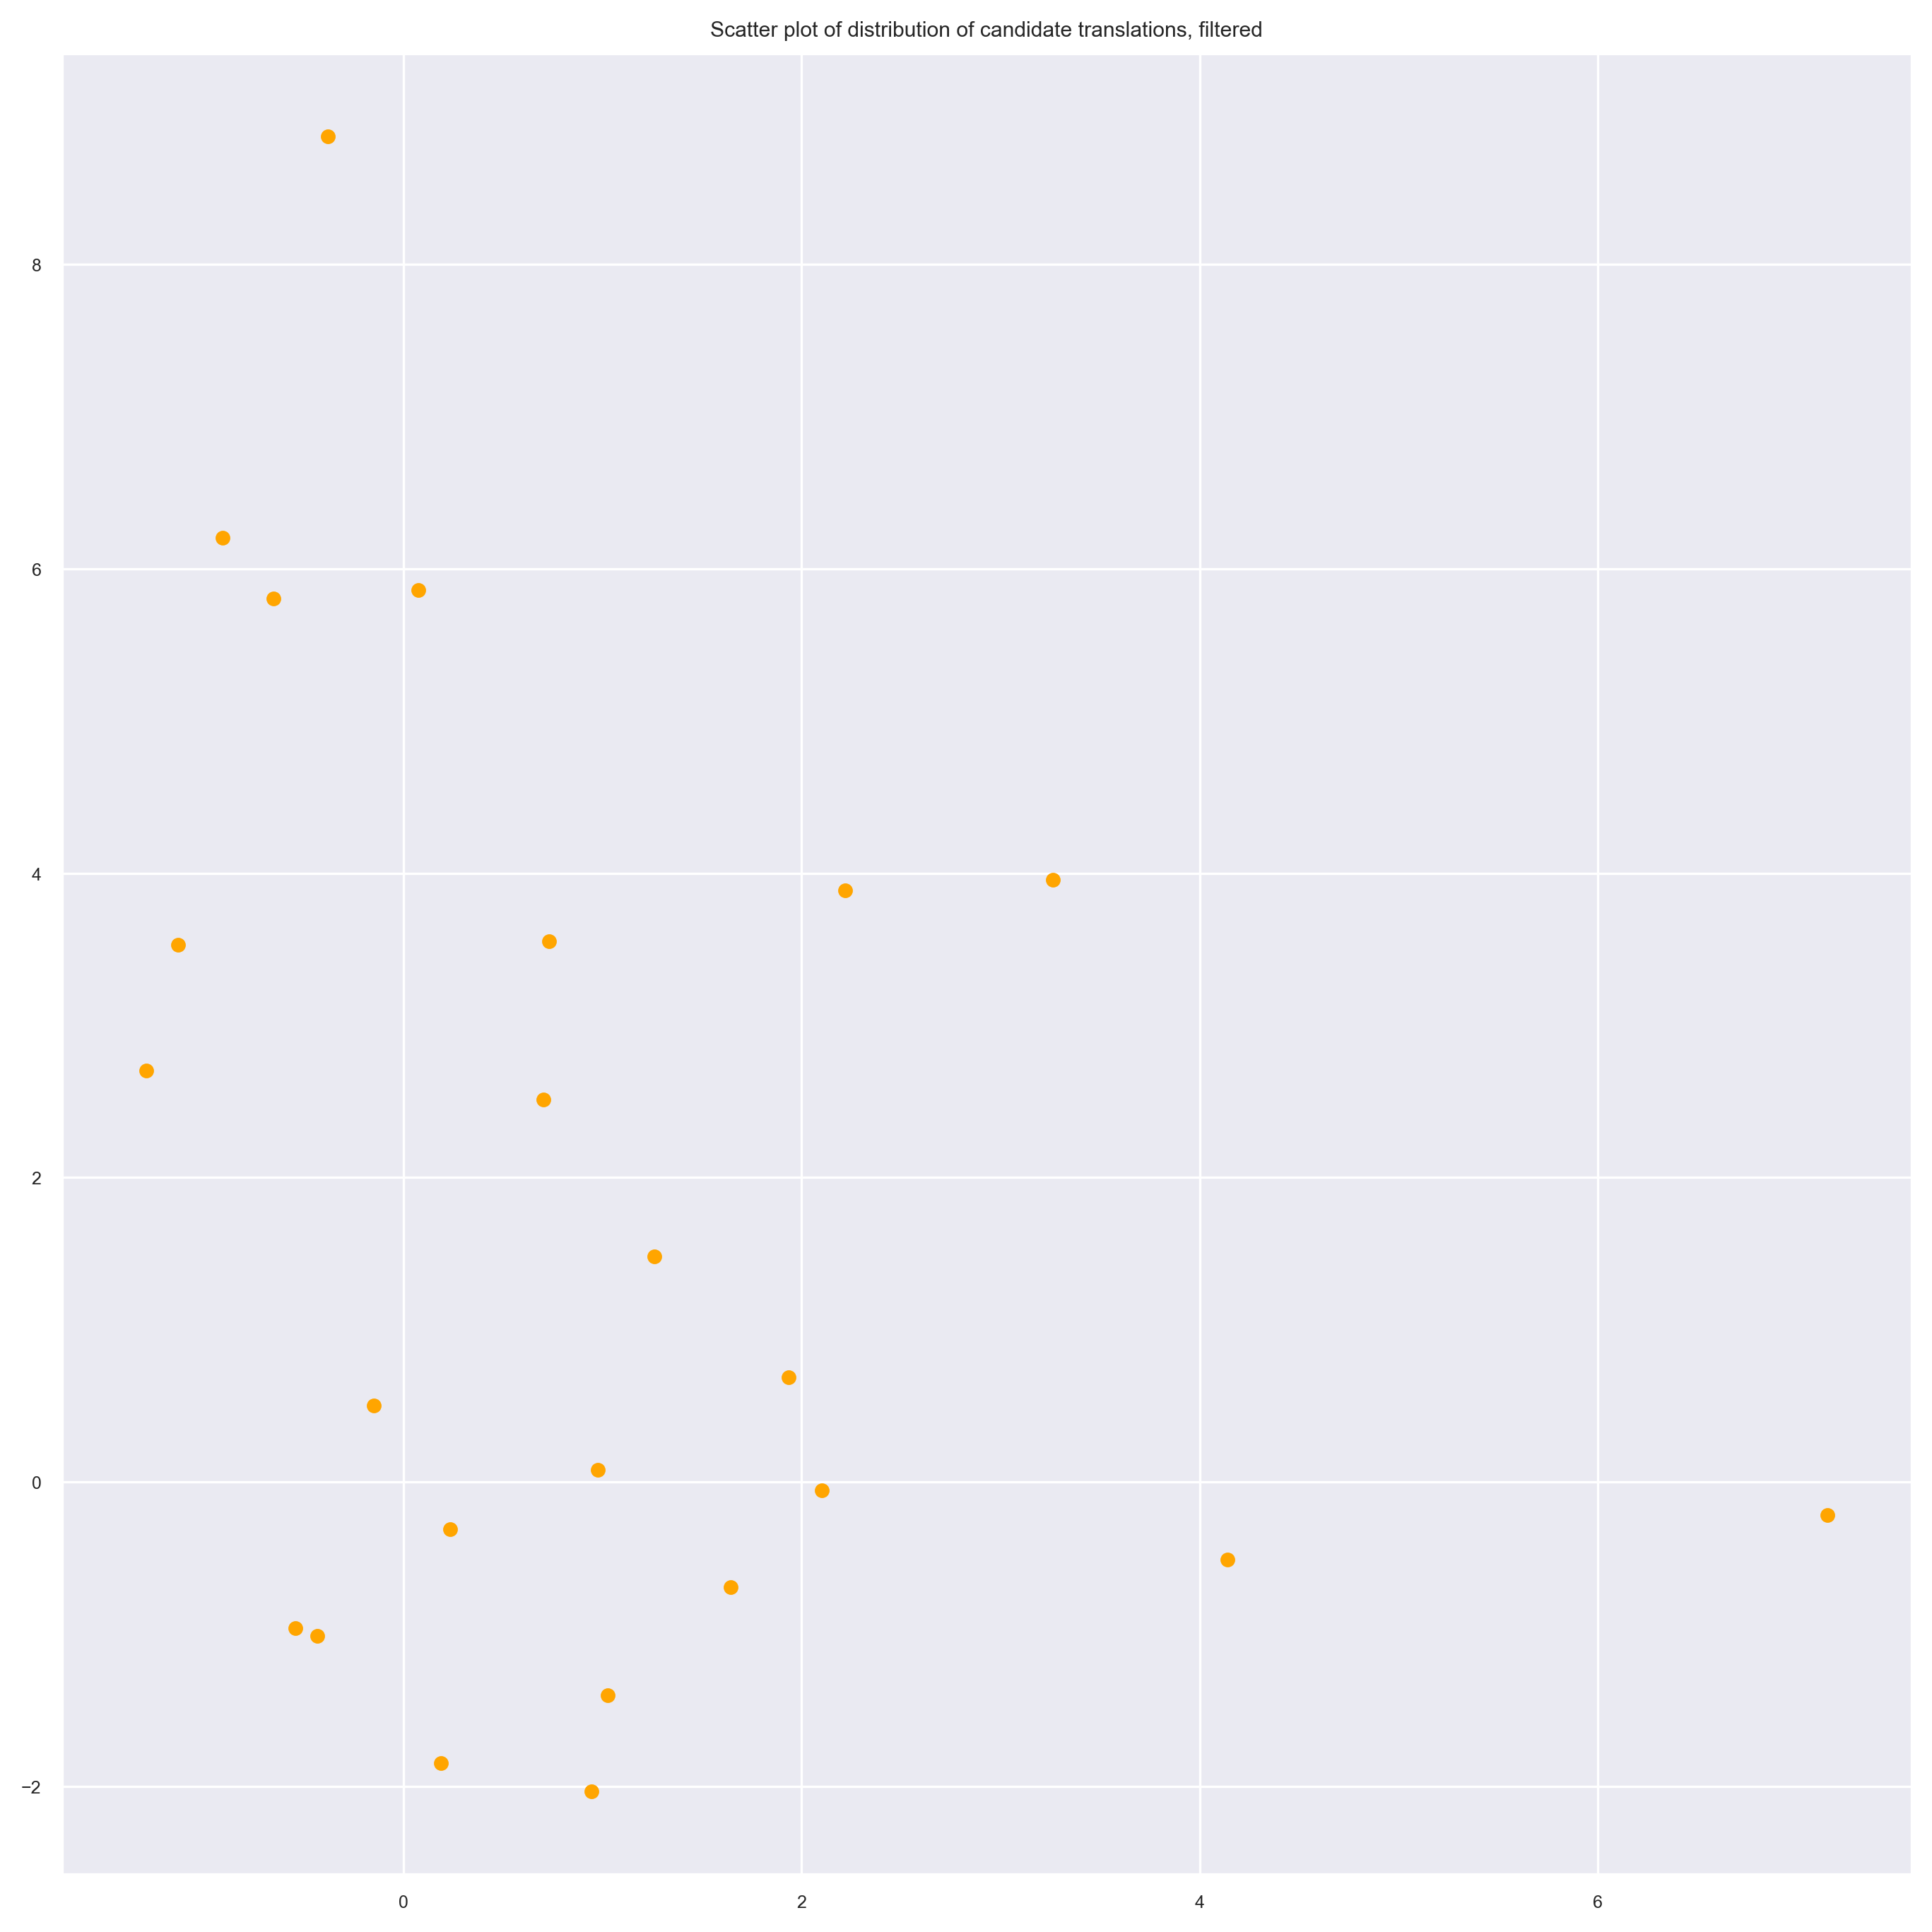

In [19]:
bins = pts2bins(err_by_tsl, prec=1)
pts = np.array([max(lst, key=lambda e: e[-1]) for lst in bins.values()])  # Sort by error

x, y = pts[:, 0], pts[:, 1]

plt.figure(figsize=(9, 9))
plot_points(np.stack([x, y]).T, lw=0, ms=8)
plt.title('Scatter plot of distribution of candidate translations, filtered')
plt.show()

